## CAPSTONE PROJECT-2 :- PRCP-1027-Skin Disorder

## PROJECT TEAM ID :- PTID-CDS-NOV-23-1706

### 1. Problem Statement:

* Task 1 :- Prepare a complete data analysis report on the given data.
* Task 2 :- Create a predictive model using machine learning techniques to predict the various classes of skin disease.
* Task3 :- Suggestions to the Doctors to identify the skin diseases of the patient at the earliest.

### Dataset Information:

* This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.

* The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical     features of erythema and scaling, with very little differences.

* The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris.

* Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. (Histopathology:The study of diseased cells and tissues using a microscope.)

* Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features.

* The values of the histopathological features are determined by an analysis of the samples under a microscope.

* In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise.

* The age feature simply represents the age of the patient.

* Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.

* The names and id numbers of the patients were recently removed from the database.



### 2. Import Libraries

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set()
import plotly.express as px
from matplotlib import rcParams

### 3. Load Dataset

In [5]:
data = pd.read_csv("dataset_35_dermatology.csv")
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


### Attribute Information:

#### Clinical Attributes:

1. **Erythema**: This indicates redness or skin inflammation.

2. **Scaling**: Refers to the presence of flakes or scales on the skin.

3. **Definite Borders**: Whether the skin lesion has clearly defined edges.

4. **Itching**: Identifies if the patient experiences itching or discomfort.

5. **Koebner Phenomenon**: Indicates if new lesions appear at the site of skin injury.

6. **Polygonal Papules**: Whether there are raised, polygonal-shaped skin lesions.

7. **Follicular Papules**: Checks for raised lesions involving hair follicles.

8. **Oral Mucosal Involvement**: Whether the condition affects the mouth's inner lining.

9. **Knee and Elbow Involvement**: If the condition primarily affects the knees and elbows.

10. **Scalp Involvement**: Identifies if the scalp is affected.

11. **Family History (0 or 1)**: Indicates whether there's a family history of similar skin disorders.

12. **Age**: The age of the patient at the time of data collection.

These clinical features help dermatologists diagnose and monitor various skin conditions. They are also useful for researchers to identify patterns and develop tailored treatment plans.

#### Histopathological Attributes:

1. **Melanin Incontinence**: The presence of melanin in the dermis due to damage to melanocytes.

2. **Eosinophils in the Infiltrate**: Detection of eosinophils in inflammatory skin lesions.

3. **PNL Infiltrate**: Presence of polymorphonuclear leukocytes in the skin tissue.

4. **Fibrosis of the Papillary Dermis**: Build-up of fibrous tissue in the upper dermis, often indicating chronic inflammation.

5. **Exocytosis**: Movement of inflammatory cells from the bloodstream into the epidermis.

6. **Acanthosis**: Thickening of the epidermis, commonly seen in certain skin conditions like psoriasis.

7. **Hyperkeratosis**: Excessive thickening of the outermost epidermal layer.

8. **Parakeratosis**: Retention of nuclei in the stratum corneum, often observed in psoriasis.

9. **Clubbing of the Rete Ridges**: Enlargement of the rete ridges, observed in some skin conditions.

10. **Elongation of the Rete Ridges**: Extended projections of the rete ridges into the dermis.

11. **Thinning of the Suprapapillary Epidermis**: Reduced thickness in the epidermis layer above the dermal papillae.

12. **Spongiform Pustule**: A blister-like structure filled with neutrophils, characteristic of pustular psoriasis.

13. **Munro Microabscess**: Small collections of neutrophils within the epidermis, typical of psoriasis.

14. **Focal Hypergranulosis**: Localized thickening of the granular layer in the epidermis.

15. **Disappearance of the Granular Layer**: Reduction or absence of the granular layer in some skin disorders.

16. **Vacuolization and Damage of Basal Layer**: Formation of vacuoles in the basal epidermal layer.

17. **Spongiosis**: Fluid accumulation between epidermal cells, often seen in eczematous conditions.

18. **Saw-tooth Appearance of Rete Ridges**: Jagged projections of the rete ridges, common in lichen planus.

19. **Follicular Horn Plug**: Collection of keratinous material in a hair follicle.

20. **Perifollicular Parakeratosis**: Parakeratosis around hair follicles.

21. **Inflammatory Mononuclear Infiltrate**: Mononuclear white blood cells indicating chronic inflammation.

22. **Band-like Infiltrate**: A linear accumulation of inflammatory cells.

These histopathological features assist dermatopathologists in diagnosing and classifying various skin disorders.

#### Class of Diseases:

1. **Psoriasis (1)**

2. **Seborrheic Dermatitis (2)**

3. **Lichen Planus (3)**

4. **Pityriasis Rosea (4)**

5. **Chronic Dermatitis (5)**

6. **Pityriasis Rubra Pilaris (6)**

These are the six diseases that are part of this dataset, representing common erythemato-squamous conditions in dermatology.

### 4. Basic Checks

In [151]:
# Check Shape:
data.shape

(366, 26)

In [152]:
# Check Dtypes:
data.dtypes

erythema                               int64
scaling                                int64
definite_borders                       int64
itching                                int64
koebner_phenomenon                     int64
polygonal_papules                      int64
follicular_papules                     int64
knee_and_elbow_involvement             int64
scalp_involvement                      int64
family_history                         int64
eosinophils_in_the_infiltrate          int64
PNL_infiltrate                         int64
fibrosis_of_the_papillary_dermis       int64
exocytosis                             int64
acanthosis                             int64
hyperkeratosis                         int64
parakeratosis                          int64
clubbing_of_the_rete_ridges            int64
elongation_of_the_rete_ridges          int64
spongiform_pustule                     int64
munro_microabcess                      int64
disappearance_of_the_granular_layer    int64
spongiosis

In [153]:
# Check Columns:
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'knee_and_elbow_involvement', 'scalp_involvement', 'family_history',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges', 'spongiform_pustule',
       'munro_microabcess', 'disappearance_of_the_granular_layer',
       'spongiosis', 'inflammatory_monoluclear_inflitrate', 'Age', 'class'],
      dtype='object')

In [154]:
# Checking Head:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,knee_and_elbow_involvement,scalp_involvement,family_history,...,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,spongiform_pustule,munro_microabcess,disappearance_of_the_granular_layer,spongiosis,inflammatory_monoluclear_inflitrate,Age,class
0,2,2,0,3,0,0,0,1,0,0,...,0,0,0,0,0,0,3,1,55,1
1,3,3,3,2,1,0,0,1,1,1,...,2,2,2,2,1,0,0,1,8,0
2,2,1,2,3,1,3,0,0,0,0,...,2,0,0,0,0,0,3,2,26,2
3,2,2,2,0,0,0,0,3,2,0,...,3,2,2,2,0,3,0,3,40,0
4,2,3,2,2,2,2,0,0,0,0,...,0,0,0,0,0,2,2,2,45,2


In [155]:
# Check Tail:
data.tail()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,knee_and_elbow_involvement,scalp_involvement,family_history,...,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,spongiform_pustule,munro_microabcess,disappearance_of_the_granular_layer,spongiosis,inflammatory_monoluclear_inflitrate,Age,class
361,2,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,2,25,3
362,3,2,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,2,36,3
363,3,2,2,2,3,2,0,0,0,0,...,0,0,0,0,0,0,0,2,28,2
364,2,1,3,1,2,3,0,0,0,0,...,0,0,0,0,0,0,0,2,50,2
365,3,2,2,0,0,0,0,3,3,0,...,2,3,2,0,2,2,0,3,35,0


In [156]:
# Check Info:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   erythema                             366 non-null    int64
 1   scaling                              366 non-null    int64
 2   definite_borders                     366 non-null    int64
 3   itching                              366 non-null    int64
 4   koebner_phenomenon                   366 non-null    int64
 5   polygonal_papules                    366 non-null    int64
 6   follicular_papules                   366 non-null    int64
 7   knee_and_elbow_involvement           366 non-null    int64
 8   scalp_involvement                    366 non-null    int64
 9   family_history                       366 non-null    int64
 10  eosinophils_in_the_infiltrate        366 non-null    int64
 11  PNL_infiltrate                       366 non-null    int64

In [12]:
# Check for Unique Categories in Data:
for i in data:
    print(i,data[i].unique())
    print(i,data[i].value_counts())
    print("*************************")

erythema [2 3 1 0]
erythema erythema
2    215
3     90
1     57
0      4
Name: count, dtype: int64
*************************
scaling [2 3 1 0]
scaling scaling
2    195
1    111
3     52
0      8
Name: count, dtype: int64
*************************
definite_borders [0 3 2 1]
definite_borders definite_borders
2    168
1     93
0     59
3     46
Name: count, dtype: int64
*************************
itching [3 2 0 1]
itching itching
0    118
2    100
3     76
1     72
Name: count, dtype: int64
*************************
koebner_phenomenon [0 1 2 3]
koebner_phenomenon koebner_phenomenon
0    224
1     70
2     54
3     18
Name: count, dtype: int64
*************************
polygonal_papules [0 3 2 1]
polygonal_papules polygonal_papules
0    297
2     41
3     27
1      1
Name: count, dtype: int64
*************************
follicular_papules [0 3 1 2]
follicular_papules follicular_papules
0    333
2     16
1     11
3      6
Name: count, dtype: int64
*************************
oral_mucosal_involve

In [13]:
# Check Describe:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
erythema,366.0,2.068306,0.664753,0.0,2.0,2.0,2.0,3.0
scaling,366.0,1.795082,0.701527,0.0,1.0,2.0,2.0,3.0
definite_borders,366.0,1.549180,0.907525,0.0,1.0,2.0,2.0,3.0
itching,366.0,1.366120,1.138299,0.0,0.0,1.0,2.0,3.0
koebner_phenomenon,366.0,0.633880,0.908016,0.0,0.0,0.0,1.0,3.0
polygonal_papules,366.0,0.448087,0.957327,0.0,0.0,0.0,0.0,3.0
follicular_papules,366.0,0.166667,0.570588,0.0,0.0,0.0,0.0,3.0
oral_mucosal_involvement,366.0,0.377049,0.834147,0.0,0.0,0.0,0.0,3.0
knee_and_elbow_involvement,366.0,0.614754,0.982979,0.0,0.0,0.0,1.0,3.0
scalp_involvement,366.0,0.519126,0.905639,0.0,0.0,0.0,1.0,3.0


### 5. EDA

Based on the given information, patients were initially examined clinically for 12 specific features. Following this, skin samples were collected for the assessment of 22 histopathological characteristics.

- **Clinical Features**: These included Erythema, Scaling, Definite borders, Itching, Koebner phenomenon, Polygonal papules, Follicular papules, Oral mucosal involvement, Knee and elbow involvement, Scalp involvement, Family history, and Age.

- **Histopathological Features**: The features evaluated from the skin samples were Melanin incontinence, Eosinophils in the infiltrate, PNL infiltrate, Fibrosis of the papillary dermis, Exocytosis, Acanthosis, Hyperkeratosis, Parakeratosis, Clubbing of the rete ridges, Elongation of the rete ridges, Thinning of the suprapapillary epidermis, Spongiform pustule, Munro microabscess, Focal hypergranulosis, Disappearance of the granular layer, Vacuolization and damage of the basal layer, Spongiosis, Saw-tooth appearance of the rete ridges, Follicular horn plug, Perifollicular parakeratosis, Inflammatory mononuclear infiltrate, and Band-like infiltrate.


### 5.1 Univariate:

### Data Visualization

#### Insights

Here, we use various data visualization methods to visually analyze and present insights from the Dermatology Dataset. By creating clear and insightful visualizations such as plots, charts, and graphs, we aim to identify patterns, relationships, and trends in the data. Data visualization helps us understand the dataset more effectively, allowing us to communicate key findings and messages to stakeholders and decision-makers. With well-crafted visualizations, we can emphasize significant patterns and correlations, supporting more informed decisions and leading to actionable insights.


In [14]:
clinical_features =['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history']

In [15]:
data1 = data.iloc[:,:11]
data1

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history
0,2,2,0,3,0,0,0,0,1,0,0
1,3,3,3,2,1,0,0,0,1,1,1
2,2,1,2,3,1,3,0,3,0,0,0
3,2,2,2,0,0,0,0,0,3,2,0
4,2,3,2,2,2,2,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,0
362,3,2,1,0,1,0,0,0,0,0,0
363,3,2,2,2,3,2,0,2,0,0,0
364,2,1,3,1,2,3,0,2,0,0,0


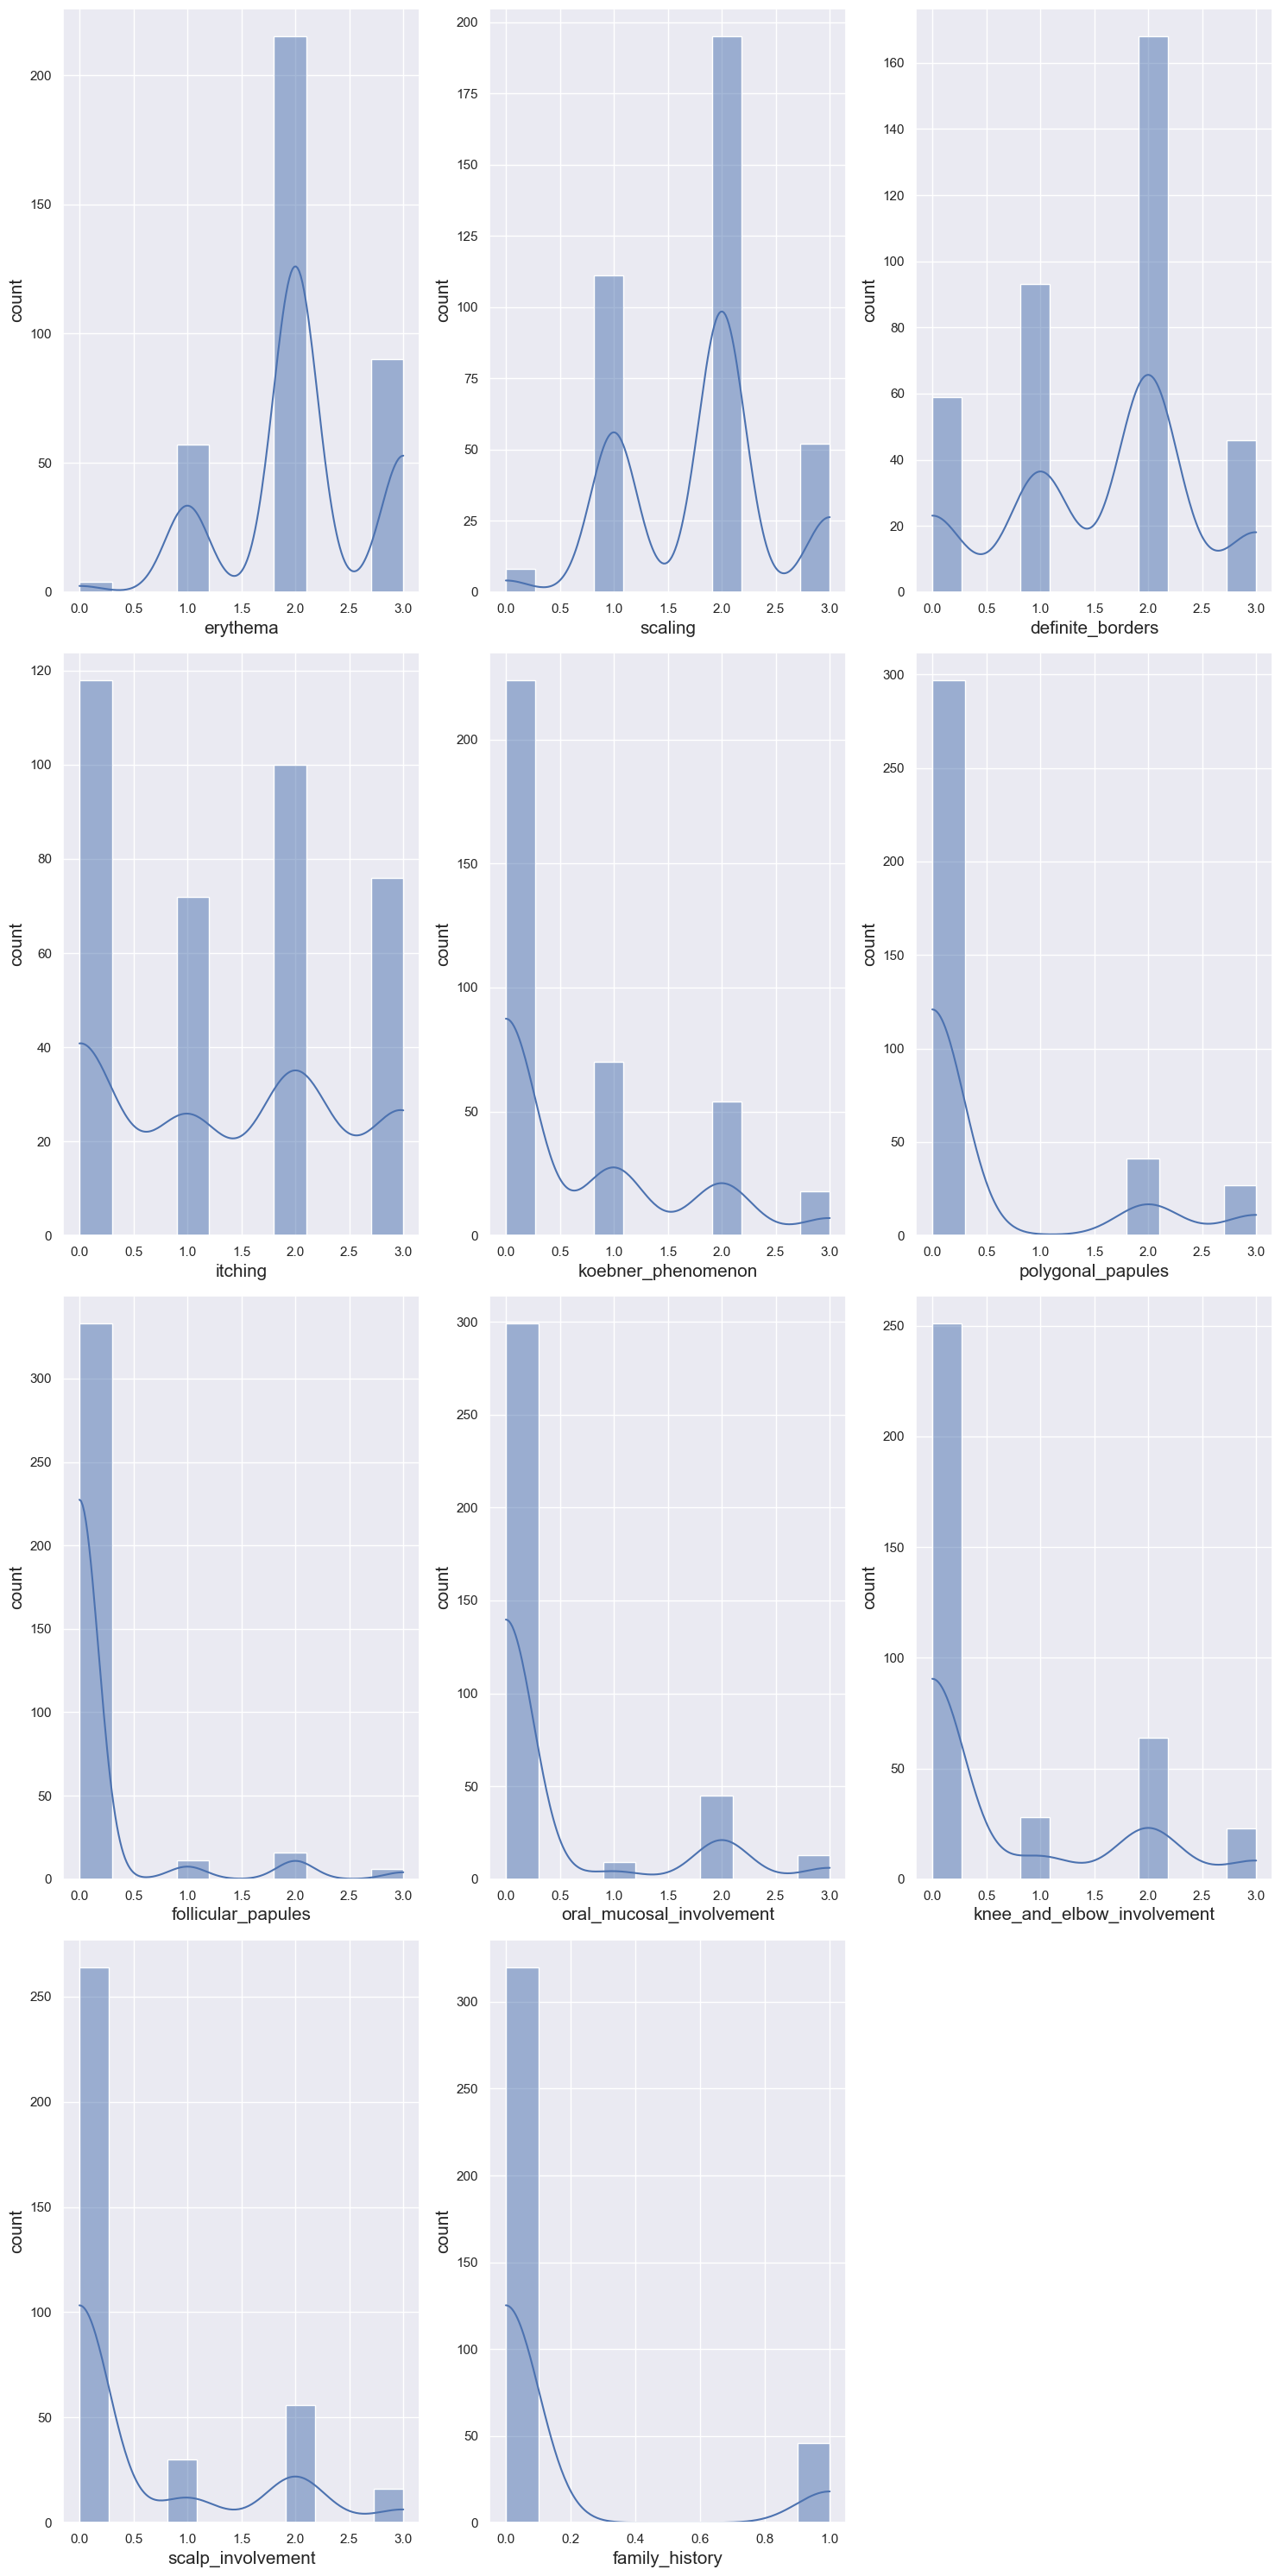

In [16]:
# Check Histplot
plt.figure(figsize=(15,30), facecolor='white')
plotnumber = 1

for clinical_features in data1:
    if plotnumber<=11 :
        ax = plt.subplot(4,3,plotnumber)
        sns.histplot(x=data1[clinical_features],kde=True)
        plt.xlabel(clinical_features,fontsize=15)
        plt.ylabel('count',fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [17]:
! pip install sweetviz

In [18]:
histopath_features =['melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate']

In [19]:
data2 = data.iloc[:,11:33]
data2

,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,...,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate
0,0,0,0,0,3,2,0,0,0,0,...,0,0,0,0,3,0,0,0,1,0
1,0,0,1,0,1,2,0,2,2,2,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,2,0,2,0,0,...,0,2,0,2,3,2,0,0,2,3
3,0,0,3,0,0,2,0,3,2,2,...,0,0,3,0,0,0,0,0,3,0
4,1,0,0,0,1,2,0,0,0,0,...,0,2,2,3,2,3,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,2,0
362,0,0,0,0,2,2,0,0,0,0,...,0,0,1,0,1,0,0,0,2,0
363,2,2,0,0,3,3,0,0,0,0,...,0,3,0,3,0,3,0,0,2,3
364,2,0,0,0,3,2,0,0,0,0,...,0,3,0,2,0,1,0,0,2,3


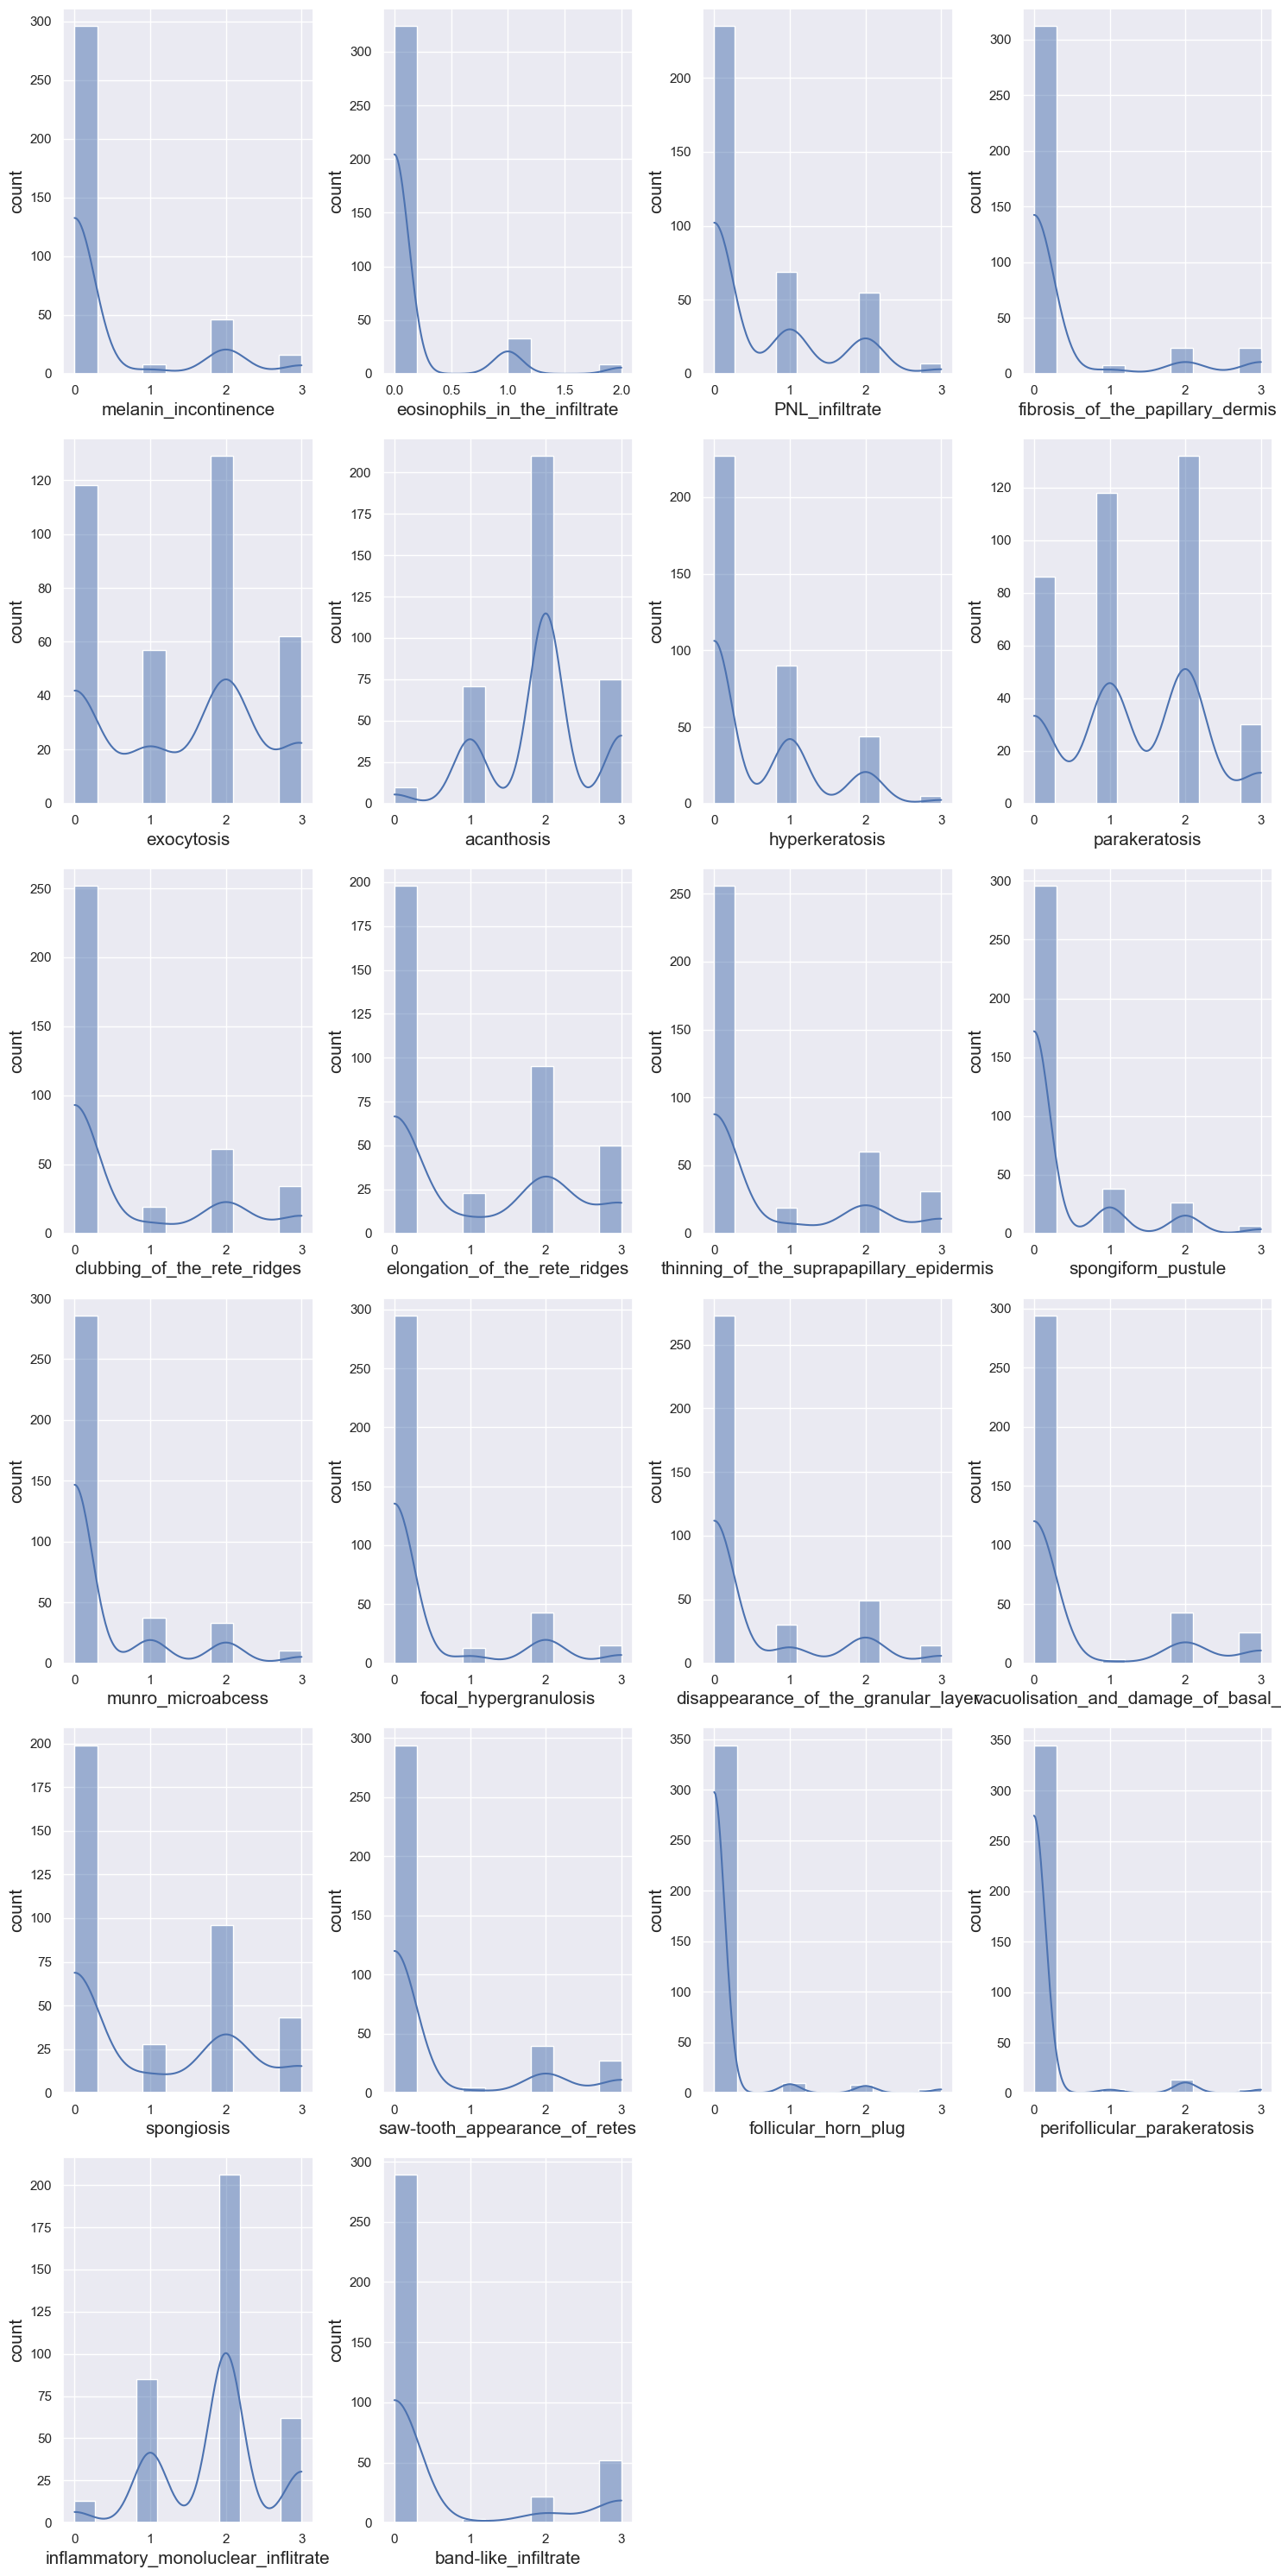

In [20]:
# Check Histplot
plt.figure(figsize=(15,30), facecolor='white')
plotnumber = 1

for histopath_features in data2:
    if plotnumber<=22 :
        ax = plt.subplot(6,4,plotnumber)
        sns.histplot(x=data2[histopath_features],kde=True)
        plt.xlabel(histopath_features,fontsize=15)
        plt.ylabel('count',fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [21]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 5.2 Bivariate

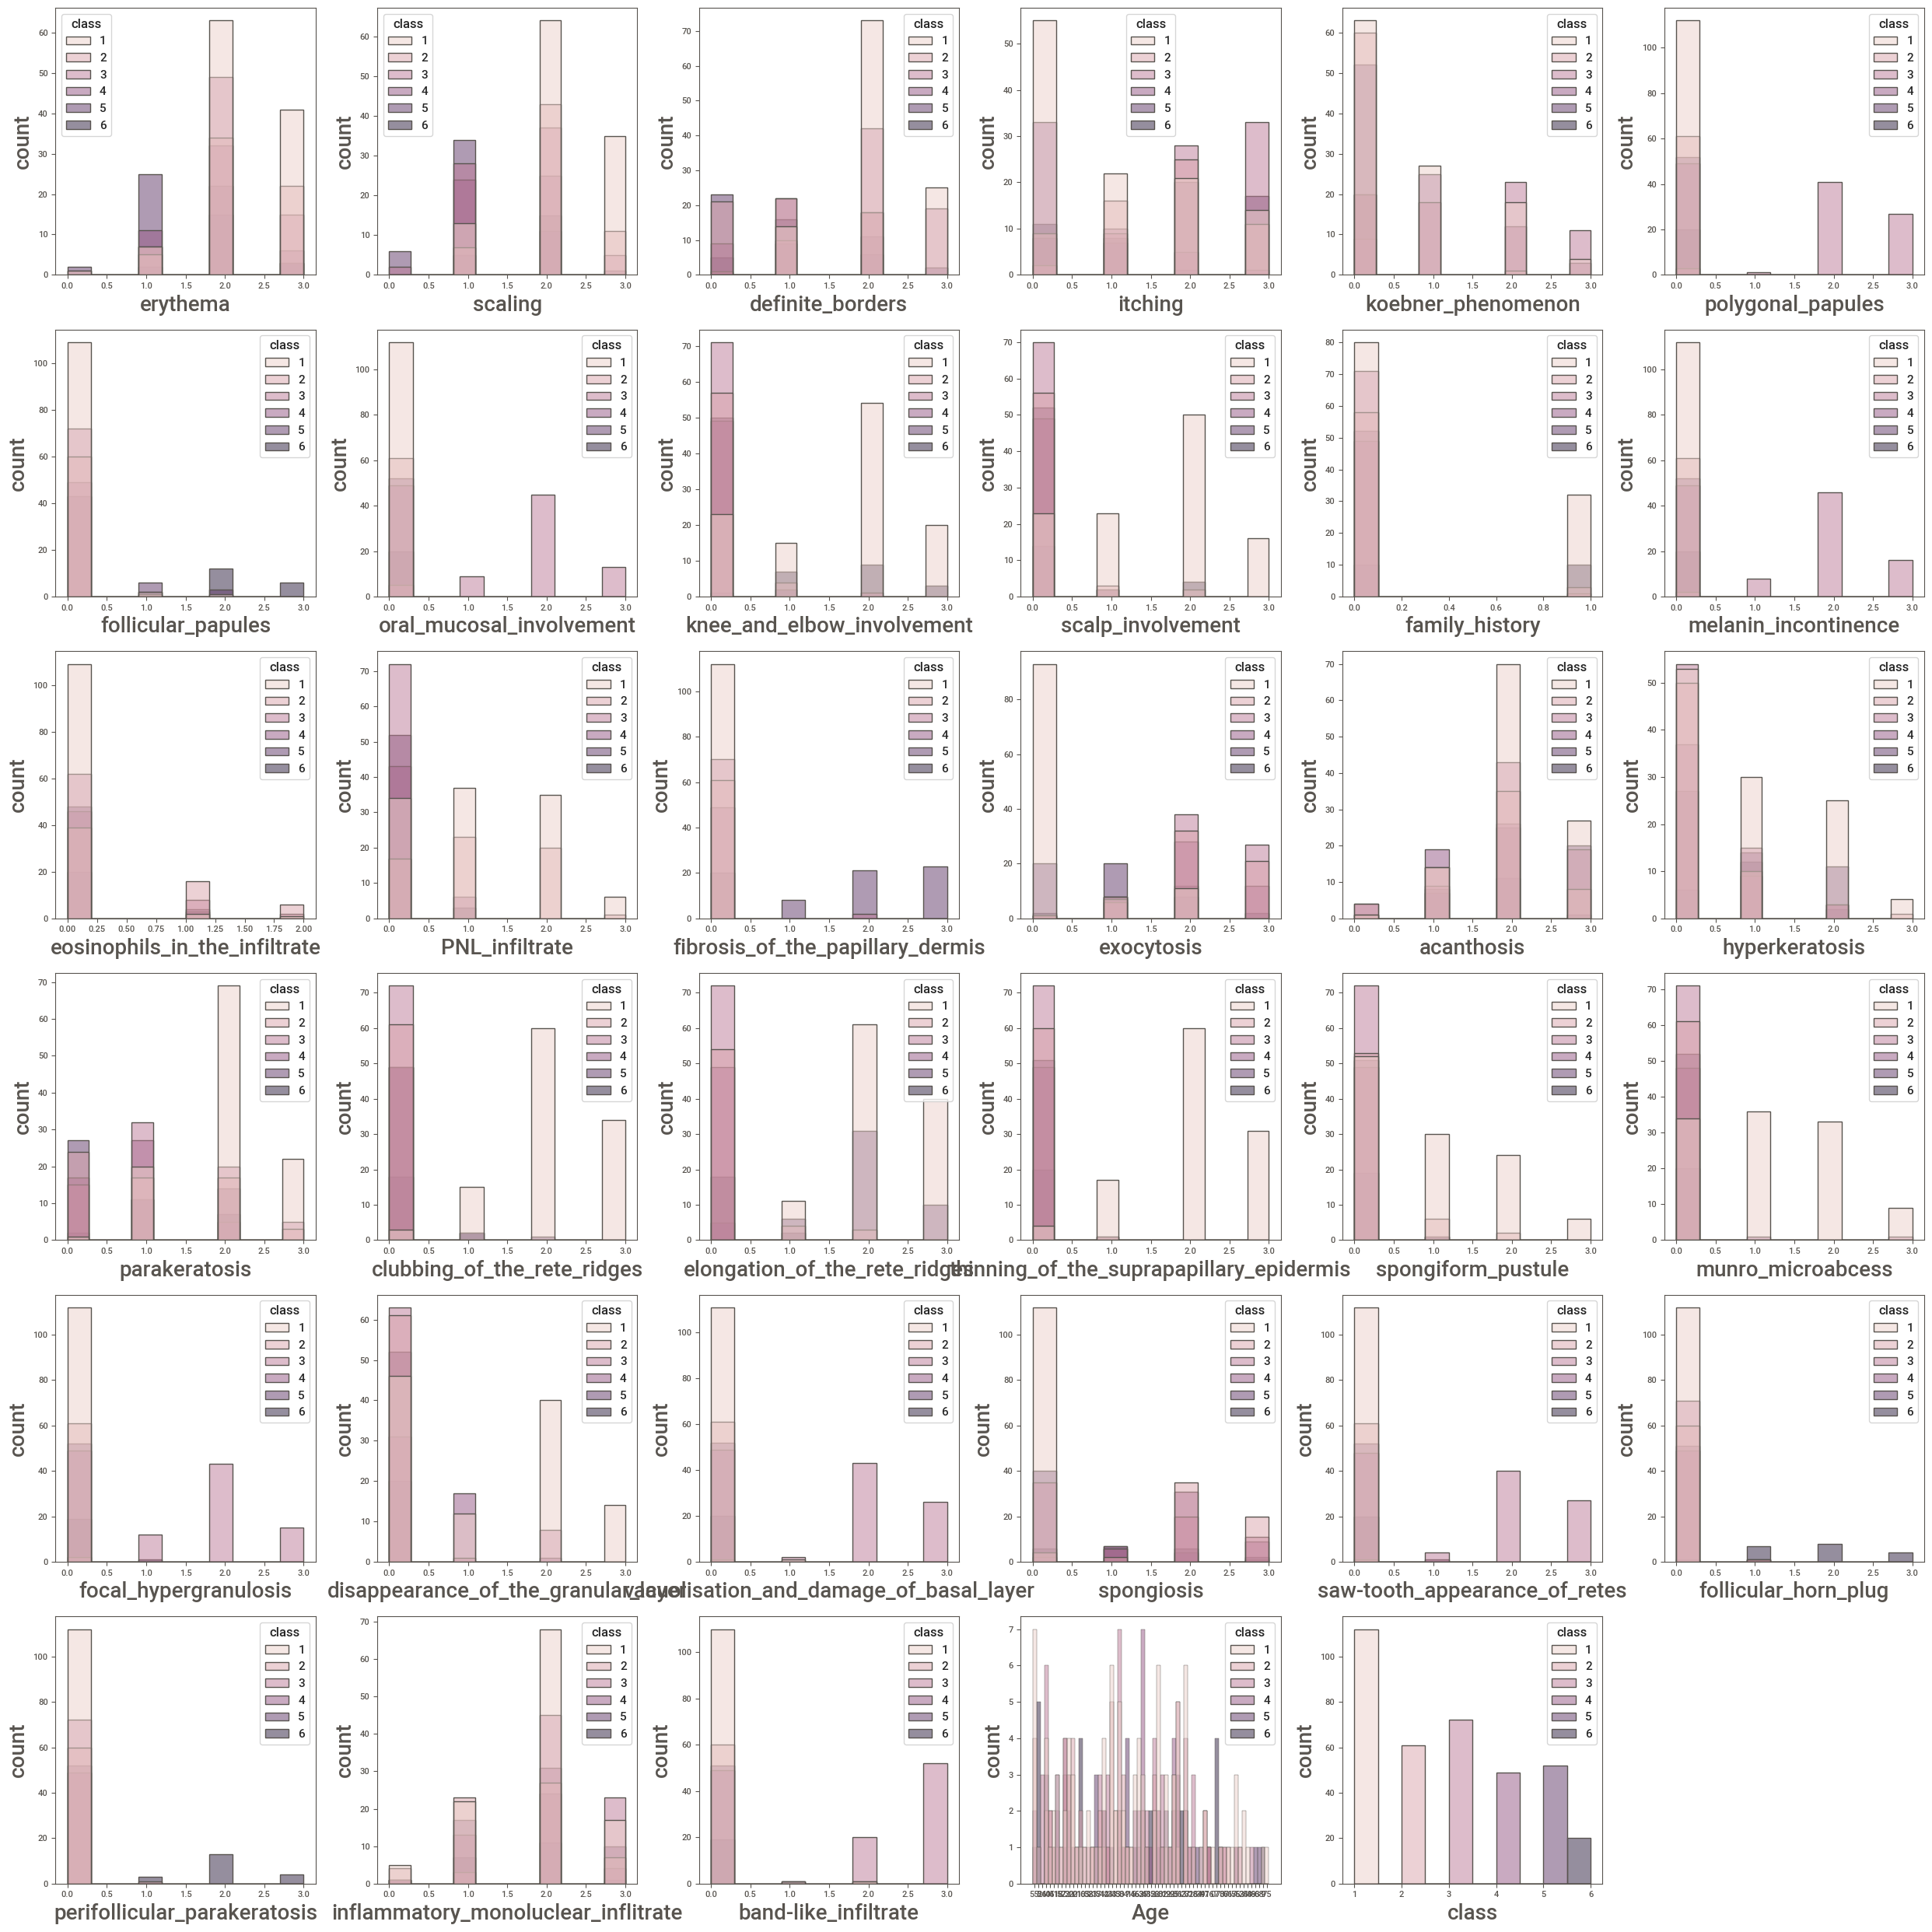

In [22]:
plt.figure(figsize=(25,25))
plotnumber = 1

for column in data:
    if plotnumber<=36:
        plt.subplot(6,6,plotnumber)
        sns.histplot(data=data, x =column, hue="class" )
        plt.xlabel(column,fontsize=20)
        plt.ylabel("count",fontsize=20)
    plotnumber+=1
plt.tight_layout()

### 6. Data Preprocessing:

#### 6.1 Checking Null Values:


In [23]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [24]:
data.duplicated().sum()

0

#### Insights

Null Values and Duplicate Values are not present.


### 6.2. Converting Categorical Columns to Numerical:

#### 1. Age

In [25]:
# Check for Unique Value in Age column:
data["Age"].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [26]:
nan_indices = data.isna()
nan_indices_tuple =np.where(nan_indices)
print("Indices of NaN values:" )
print(nan_indices_tuple)

Indices of NaN values:
(array([], dtype=int64), array([], dtype=int64))


In [27]:
data["Age"] = pd.to_numeric(data["Age"], errors='coerce').astype(pd.Int64Dtype())
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [28]:
data["Age"]=data["Age"].fillna(data["Age"].median())
data["Age"]=data["Age"].replace(0,data["Age"].median())

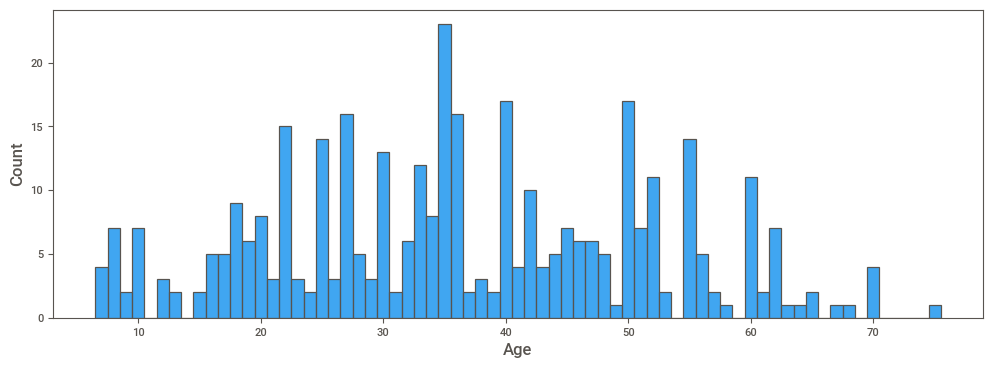

In [29]:
plt.figure(figsize=(12,4))
sns.histplot(data['Age'], discrete=True)
plt.show()

#### Insights

A histogram provides a visual representation of the distribution of a numerical variable like the 'age' column in a DataFrame. By creating a histogram, we can determine the frequency and range of ages in the dataset. This visualization helps reveal patterns or irregularities in the age distribution, indicating if it is skewed, normally distributed, or has any pronounced peaks or gaps.

#### 2. Class

In [31]:
# Source column Encoded by mannual encoding:
data["class"]=data["class"].map({1: "psoriasis", 2: "seborrheic dermatitis", 3: "lichen planus", 4: "pityriasis rosea", 5: "chronic dermatitis", 6: "pityriasis rubra"})
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,seborrheic dermatitis
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,psoriasis
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,lichen planus
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,psoriasis
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,lichen planus


In [32]:
# Check for Unique Value in Class column:
data["class"].unique()

array(['seborrheic dermatitis', 'psoriasis', 'lichen planus',
       'chronic dermatitis', 'pityriasis rosea', 'pityriasis rubra'],
      dtype=object)

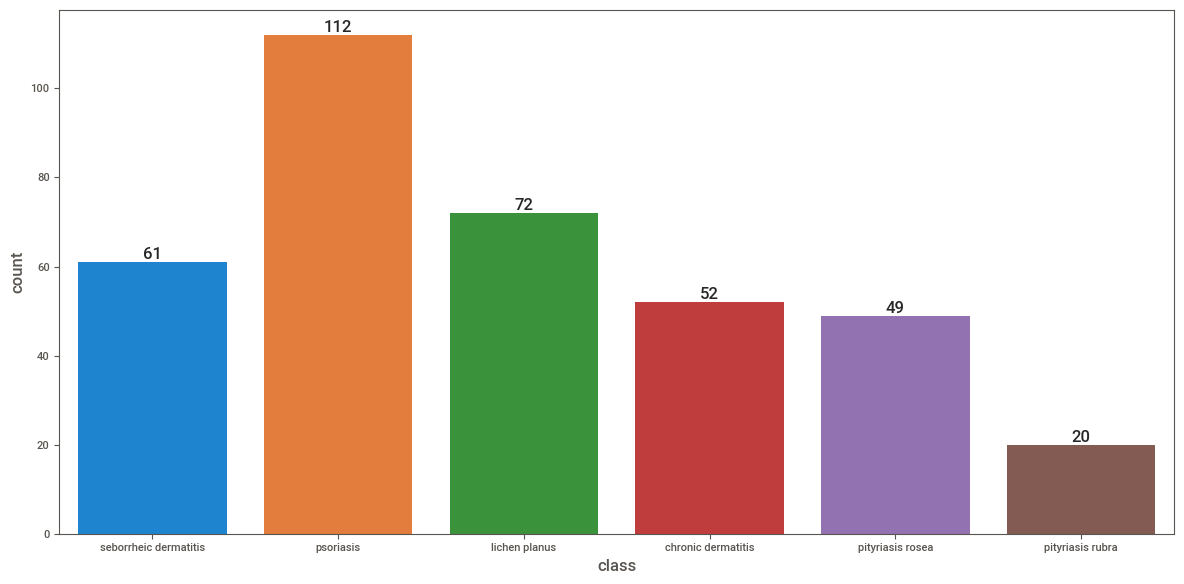

In [33]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['class'])
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()

#### Insight

A bar plot is a great tool for showing the frequency or count of various categories within a categorical variable, like the 'class' column in a DataFrame. By creating a count plot, you can easily see how many instances exist for each class and gather insights about their distribution. This type of visualization can highlight imbalances among classes, indicate which are more prevalent or underrepresented, and offer a snapshot of the distribution of the target variable.

<Axes: ylabel='count'>

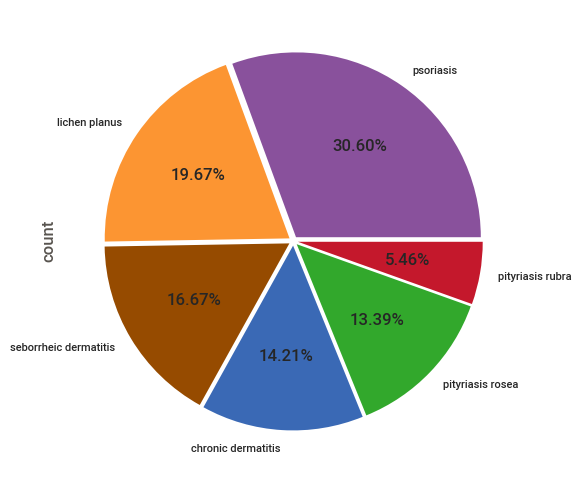

In [34]:
plt.figure(figsize=(16,6))
data['class'].value_counts().plot(kind='pie', autopct='%0.02f%%', radius=1.0, pctdistance=0.6, colors= ['#89519c','#FC9532','#964B00','#3a69b5', '#32a82c','#c4182c'] ,explode = [0.025, 0.025, 0.025, 0.025, 0.025, 0.025])

### Age-Based Distribution of Skin Disease Classes.

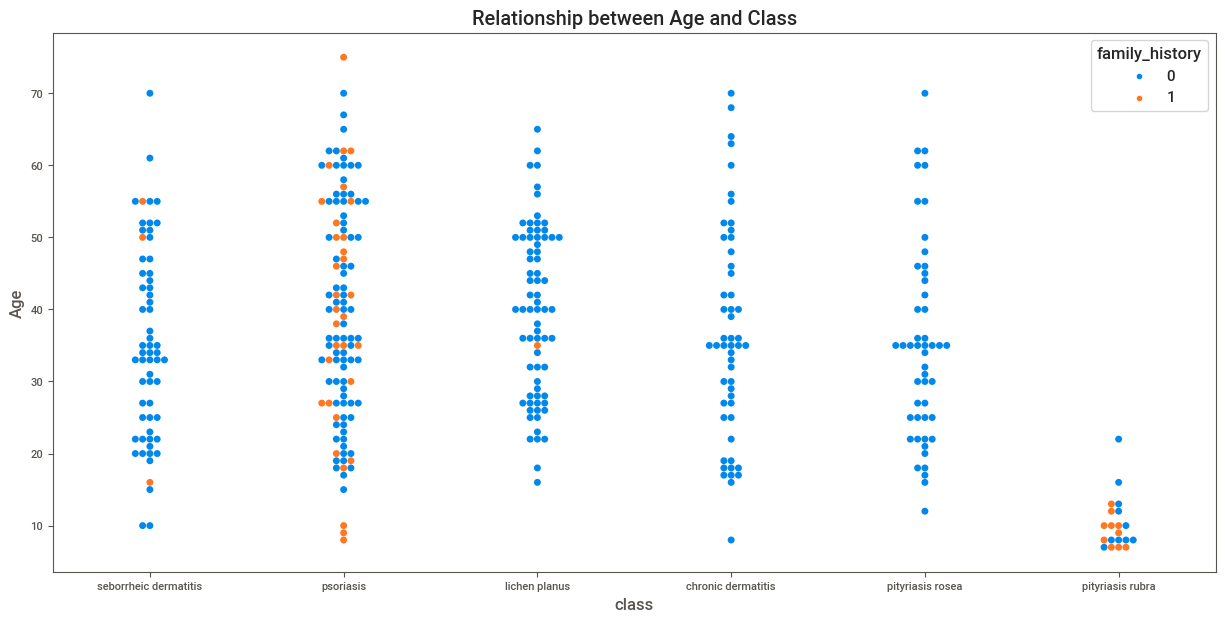

In [35]:
plt.figure(figsize=(15,7))
sns.swarmplot(y="Age", x="class", data=data, hue='family_history')
plt.title('Relationship between Age and Class')
plt.show()

#### Insights:

- Pityriasis Rubra Pilaris occurs only in individuals under 20 years old and has a strong link to family history, with about half of the patients reporting a family history of the condition.
- Apart from Pityriasis Rubra Pilaris, the other classes of skin diseases are found across nearly all age groups.
- Psoriasis also shows a significant connection to family history.

In [36]:
# Check for value_counts of Class column:
data["class"].value_counts()

class
psoriasis                112
lichen planus             72
seborrheic dermatitis     61
chronic dermatitis        52
pityriasis rosea          49
pityriasis rubra          20
Name: count, dtype: int64

In [37]:
data["class"]=data["class"].map({"psoriasis":0, "seborrheic dermatitis":1, "lichen planus":2, "pityriasis rosea":3, "chronic dermatitis":4 , "pityriasis rubra":5})

In [38]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,1
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,0
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,2
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,0
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,2


### 6.3 Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = data.drop("class",axis=1)
data1 = scale.fit_transform(X)
data1

array([[0.66666667, 0.66666667, 0.        , ..., 0.33333333, 0.        ,
        0.70588235],
       [1.        , 1.        , 1.        , ..., 0.33333333, 0.        ,
        0.01470588],
       [0.66666667, 0.33333333, 0.66666667, ..., 0.66666667, 1.        ,
        0.27941176],
       ...,
       [1.        , 0.66666667, 0.66666667, ..., 0.66666667, 1.        ,
        0.30882353],
       [0.66666667, 0.33333333, 1.        , ..., 0.66666667, 1.        ,
        0.63235294],
       [1.        , 0.66666667, 0.66666667, ..., 1.        , 0.        ,
        0.41176471]])

In [40]:
X.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age'],
      dtype='object')

In [41]:
data1 = pd.DataFrame(data1, columns=X.columns)
data1

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age
0,0.666667,0.666667,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.333333,0.0,0.705882
1,1.000000,1.000000,1.000000,0.666667,0.333333,0.000000,0.0,0.000000,0.333333,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.333333,0.0,0.014706
2,0.666667,0.333333,0.666667,1.000000,0.333333,1.000000,0.0,1.000000,0.000000,0.000000,...,0.666667,0.000000,0.666667,1.000000,0.666667,0.0,0.0,0.666667,1.0,0.279412
3,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.666667,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.485294
4,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,0.0,0.666667,0.000000,0.000000,...,0.666667,0.666667,1.000000,0.666667,1.000000,0.0,0.0,0.666667,1.0,0.558824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.666667,0.333333,0.333333,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.0,0.666667,0.0,0.264706
362,1.000000,0.666667,0.333333,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.333333,0.000000,0.333333,0.000000,0.0,0.0,0.666667,0.0,0.426471
363,1.000000,0.666667,0.666667,0.666667,1.000000,0.666667,0.0,0.666667,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.666667,1.0,0.308824
364,0.666667,0.333333,1.000000,0.333333,0.666667,1.000000,0.0,0.666667,0.000000,0.000000,...,1.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.0,0.666667,1.0,0.632353


### 7. Feature Engineering:

#### 7.1 Correlation:

In [42]:
data.corr()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
erythema,1.000000,0.435467,0.260087,-0.047623,0.000694,0.033571,-0.109550,-0.026810,0.141008,0.186684,...,0.159100,0.002559,0.022468,-0.005779,-0.005450,0.009539,0.075758,-0.006955,-0.014001,-0.335537
scaling,0.435467,1.000000,0.357987,-0.084197,-0.010576,-0.075035,-0.092400,-0.082969,0.298398,0.301577,...,0.211484,-0.109523,0.012151,-0.114467,-0.010518,-0.011135,-0.010977,-0.132079,0.010195,-0.468688
definite_borders,0.260087,0.357987,1.000000,-0.062564,0.241342,0.327754,-0.166662,0.286684,0.302309,0.268862,...,0.354768,0.298095,-0.255536,0.274576,-0.086250,-0.123947,0.111882,0.282578,0.135103,-0.391974
itching,-0.047623,-0.084197,-0.062564,1.000000,0.267878,0.409696,-0.144825,0.359163,-0.299645,-0.155639,...,-0.192684,0.367650,0.017514,0.376186,-0.175866,-0.184074,0.062781,0.386691,0.044865,0.054772
koebner_phenomenon,0.000694,-0.010576,0.241342,0.267878,1.000000,0.394108,-0.172741,0.392554,-0.066372,0.015202,...,0.004327,0.376473,-0.005938,0.381687,-0.147955,-0.164364,0.083358,0.382844,0.083811,-0.091323
polygonal_papules,0.033571,-0.075035,0.327754,0.409696,0.394108,1.000000,-0.137093,0.865142,-0.276058,-0.253234,...,-0.119698,0.911626,0.080063,0.895107,-0.095477,-0.110204,0.228426,0.905822,0.093712,0.057785
follicular_papules,-0.109550,-0.092400,-0.166662,-0.144825,-0.172741,-0.137093,1.000000,-0.132394,0.222255,-0.003535,...,-0.157296,-0.139960,-0.013454,-0.139141,0.785282,0.844929,-0.084864,-0.133871,-0.375243,0.477813
oral_mucosal_involvement,-0.026810,-0.082969,0.286684,0.359163,0.392554,0.865142,-0.132394,1.000000,-0.283466,-0.259813,...,-0.106704,0.887552,0.120344,0.875209,-0.082601,-0.106426,0.250937,0.892341,0.108523,0.055805
knee_and_elbow_involvement,0.141008,0.298398,0.302309,-0.299645,-0.066372,-0.276058,0.222255,-0.283466,1.000000,0.659206,...,0.481743,-0.282151,-0.413200,-0.280395,0.232903,0.257661,-0.068621,-0.276711,-0.068906,-0.383305
scalp_involvement,0.186684,0.301577,0.268862,-0.155639,0.015202,-0.253234,-0.003535,-0.259813,0.659206,1.000000,...,0.488804,-0.252483,-0.420718,-0.257210,-0.051894,-0.017352,0.035152,-0.249975,0.048073,-0.533208


#### 7.2 Heatmap:

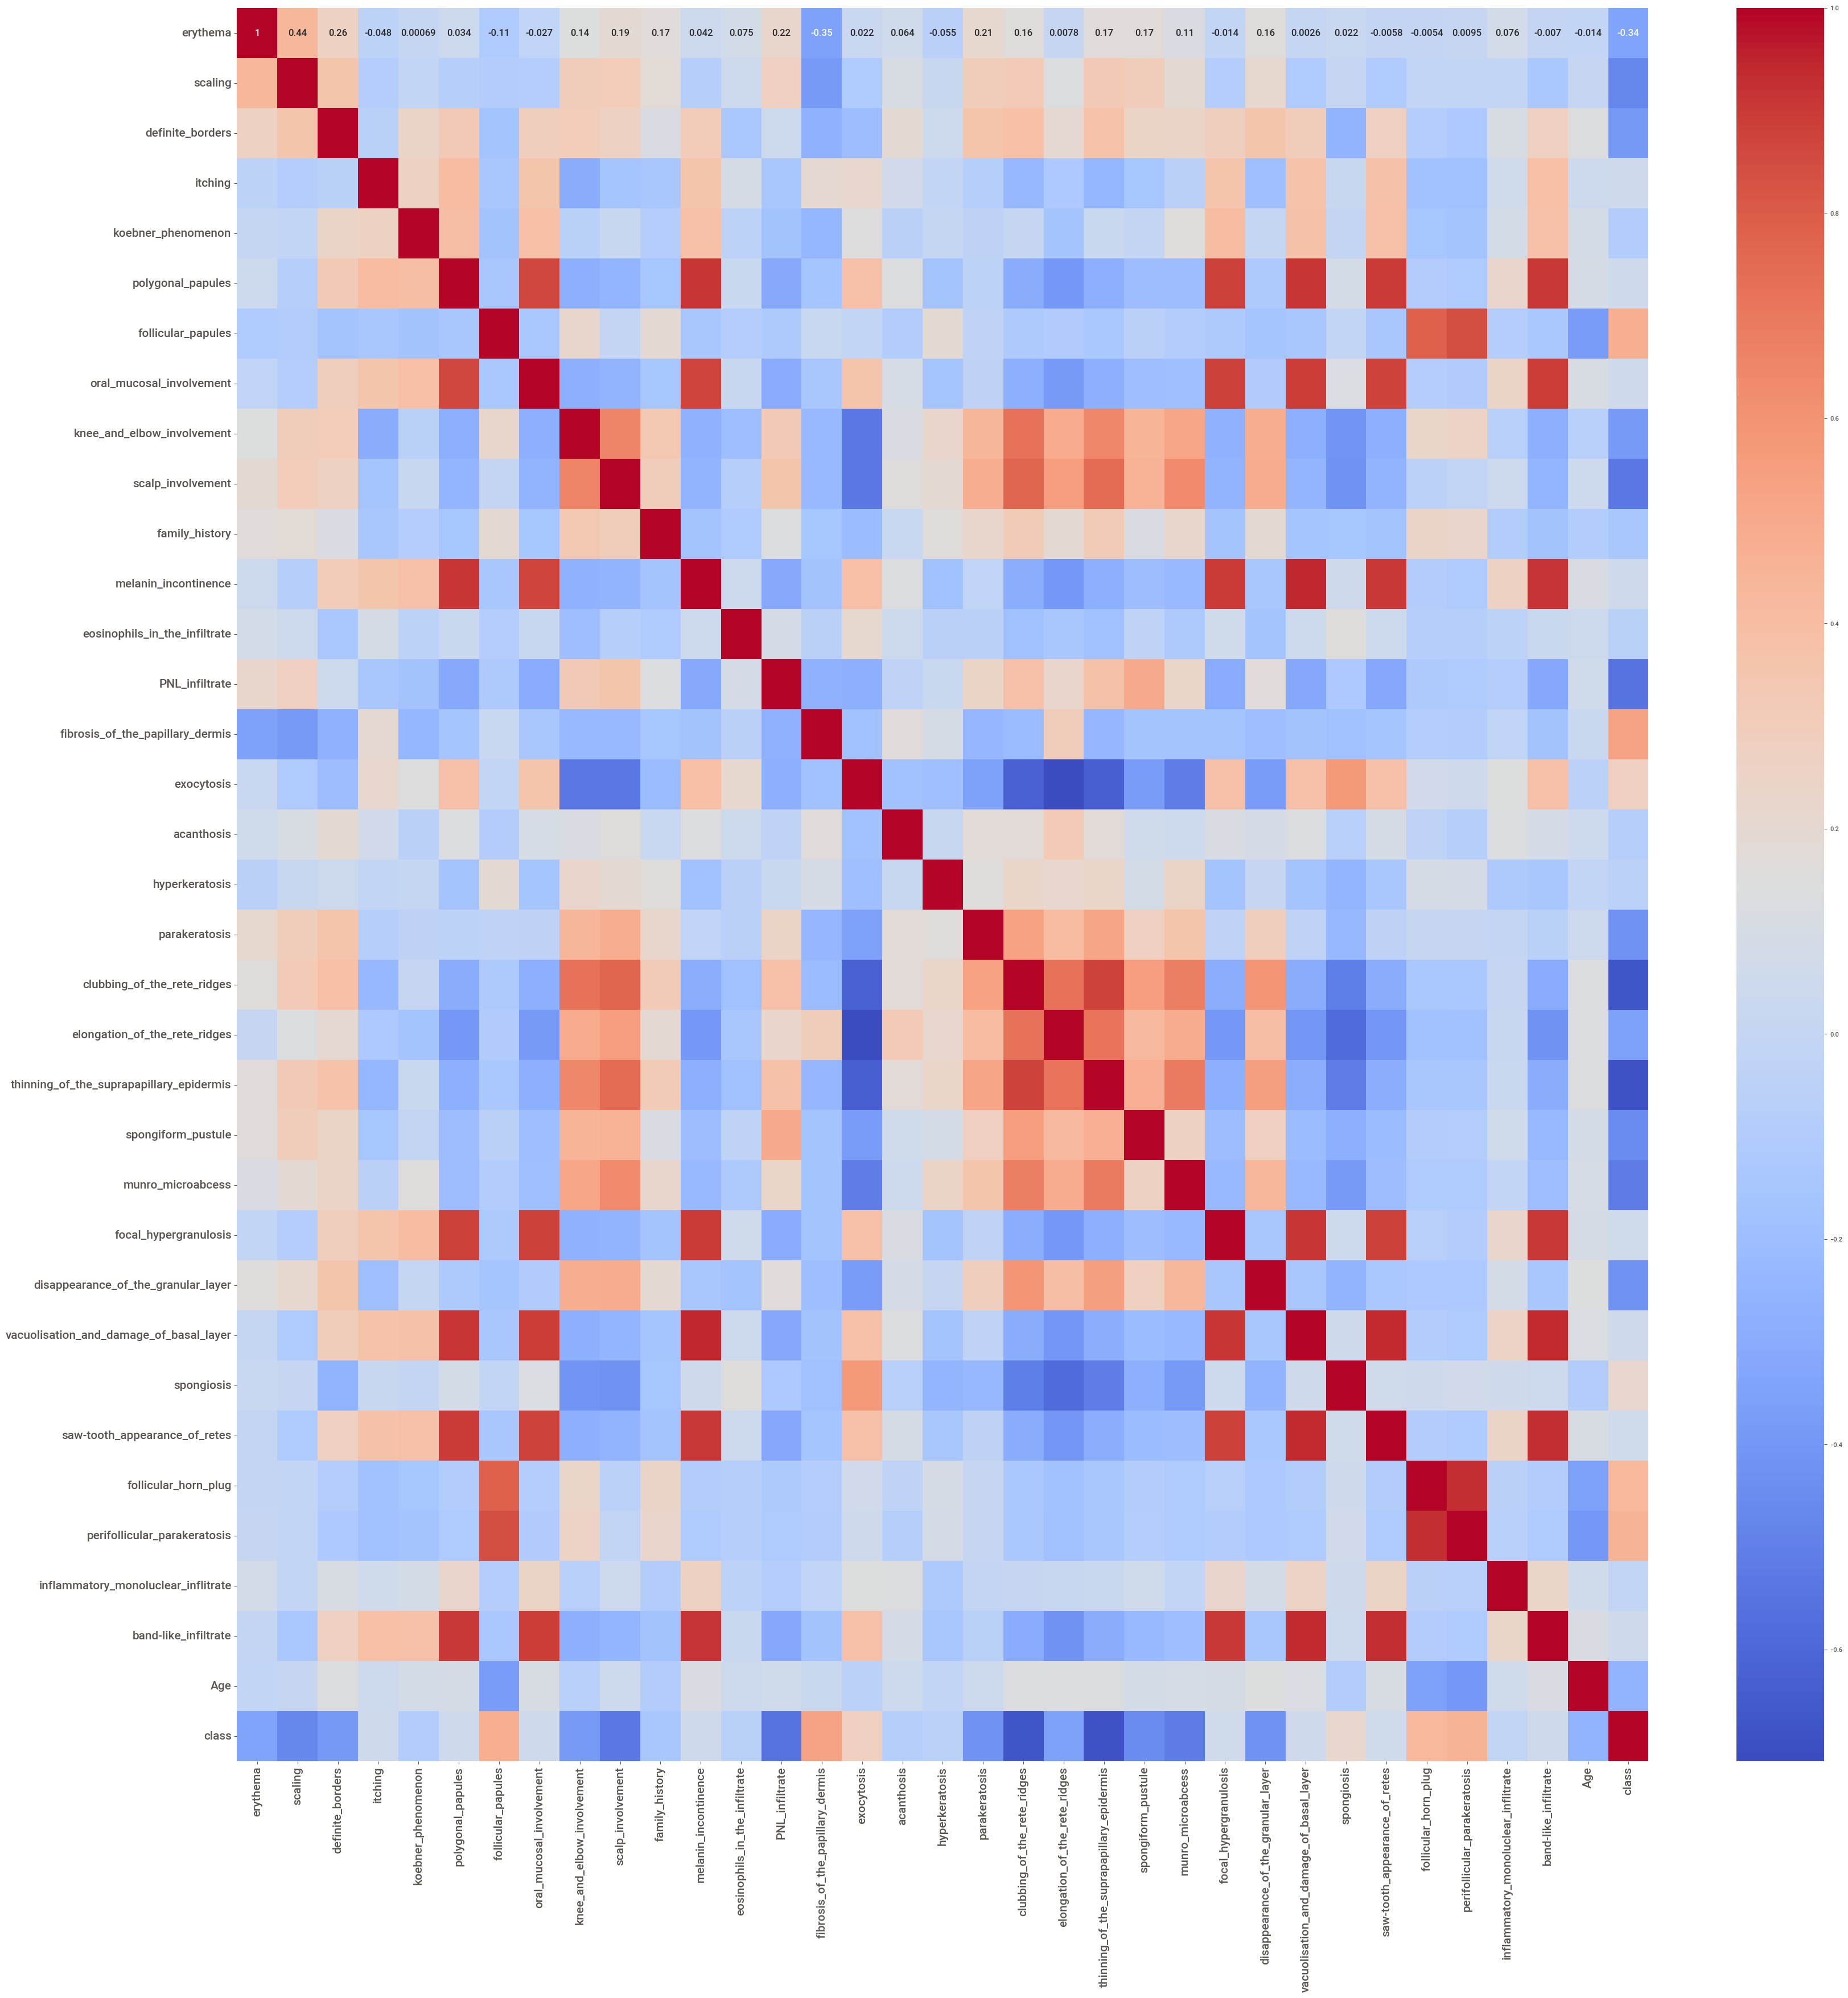

In [45]:
plt.figure(figsize=(40,40))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.tick_params(labelsize=15)  # Corrected 'ticks' to 'tick_params'
plt.show()

In [46]:
data.drop(["oral_mucosal_involvement","melanin_incontinence","focal_hypergranulosis","vacuolisation_and_damage_of_basal_layer",
          "saw-tooth_appearance_of_retes","perifollicular_parakeratosis","band-like_infiltrate",
           "thinning_of_the_suprapapillary_epidermis","follicular_horn_plug"],axis=1, inplace=True)

#### Insights:

We are eliminating these columns because they show a high degree of correlation.

# 8. Model Creation:
## 8.1 Logistic Regression:
### Split data into X & Y:

In [47]:
x = data.drop("class",axis=1)
y = pd.DataFrame(data["class"])

In [48]:
x

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,knee_and_elbow_involvement,scalp_involvement,family_history,...,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,spongiform_pustule,munro_microabcess,disappearance_of_the_granular_layer,spongiosis,inflammatory_monoluclear_inflitrate,Age
0,2,2,0,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,3,1,55
1,3,3,3,2,1,0,0,1,1,1,...,0,2,2,2,2,1,0,0,1,8
2,2,1,2,3,1,3,0,0,0,0,...,0,2,0,0,0,0,0,3,2,26
3,2,2,2,0,0,0,0,3,2,0,...,0,3,2,2,2,0,3,0,3,40
4,2,3,2,2,2,2,0,0,0,0,...,0,0,0,0,0,0,2,2,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,25
362,3,2,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2,36
363,3,2,2,2,3,2,0,0,0,0,...,0,0,0,0,0,0,0,0,2,28
364,2,1,3,1,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,2,50


In [49]:
y

,class
0,1
1,0
2,2
3,0
4,2
...,...
361,3
362,3
363,2
364,2


In [50]:
# Training and Testing data:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45)

In [51]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(274, 25)
(92, 25)
(274, 1)
(92, 1)


### Model Building:

In [52]:
# Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression


# Initialising the model
model = LogisticRegression()


# Training the model using x_train and y_train:
model.fit(x_train,y_train)

LogisticRegression()

In [53]:
# Check prediction using x_test:
y_pred_lr = model.predict(x_test)
y_pred_lr

array([2, 3, 0, 1, 0, 2, 0, 0, 4, 4, 1, 5, 1, 5, 2, 0, 3, 0, 4, 5, 2, 1,
       0, 0, 4, 0, 2, 5, 1, 3, 3, 2, 0, 3, 1, 0, 0, 0, 4, 1, 0, 0, 0, 1,
       0, 3, 2, 0, 3, 2, 1, 1, 2, 0, 2, 2, 2, 3, 2, 4, 0, 1, 3, 4, 0, 4,
       3, 2, 0, 1, 0, 0, 3, 5, 0, 1, 3, 3, 3, 4, 0, 0, 0, 5, 3, 1, 2, 0,
       0, 0, 3, 4], dtype=int64)

In [54]:
# Check prediction using x_train:
y_train_pred_lr = model.predict(x_train)
y_train_pred_lr

array([0, 3, 0, 0, 5, 3, 0, 5, 2, 2, 0, 4, 3, 0, 0, 3, 0, 0, 1, 0, 3, 3,
       0, 2, 2, 3, 2, 3, 4, 1, 4, 1, 0, 2, 3, 1, 4, 1, 1, 5, 2, 0, 2, 5,
       3, 4, 3, 2, 4, 4, 1, 3, 2, 4, 4, 0, 0, 2, 0, 0, 3, 4, 1, 4, 1, 4,
       4, 2, 1, 2, 4, 4, 0, 3, 1, 0, 3, 2, 2, 5, 0, 5, 1, 2, 4, 1, 0, 1,
       0, 1, 0, 0, 0, 2, 3, 0, 0, 4, 0, 1, 0, 1, 1, 2, 3, 4, 0, 4, 2, 3,
       1, 4, 2, 0, 4, 5, 0, 4, 3, 0, 1, 2, 0, 4, 3, 1, 2, 5, 0, 1, 3, 2,
       1, 0, 4, 2, 5, 1, 1, 0, 3, 1, 4, 3, 1, 1, 2, 1, 3, 0, 0, 2, 1, 0,
       2, 0, 4, 0, 0, 3, 0, 3, 2, 2, 4, 0, 0, 0, 0, 1, 0, 2, 0, 0, 4, 0,
       3, 0, 2, 4, 0, 0, 5, 2, 1, 2, 2, 1, 2, 1, 3, 2, 0, 2, 3, 0, 4, 2,
       4, 3, 4, 0, 2, 0, 2, 0, 4, 5, 0, 1, 2, 1, 0, 4, 2, 0, 3, 1, 0, 0,
       1, 1, 2, 4, 1, 1, 0, 2, 2, 0, 0, 0, 4, 4, 0, 2, 4, 0, 2, 3, 1, 1,
       0, 4, 0, 0, 1, 0, 2, 2, 3, 2, 1, 5, 0, 2, 0, 5, 4, 0, 4, 2, 2, 2,
       0, 2, 3, 1, 4, 5, 2, 3, 0, 0], dtype=int64)

####  Evaluate the Module:

In [55]:
from sklearn.metrics import classification_report,accuracy_score

In [56]:
lr_acc = accuracy_score(y_test,y_pred_lr)
lr_acc

0.9891304347826086

In [57]:
# Evaluating Logistic Regression model:
print("Logistic Regression training set score:" , accuracy_score(y_train, y_train_pred_lr))
print("Logistic Regression test set score:" , accuracy_score(y_test, y_pred_lr))

Logistic Regression training set score: 0.9890510948905109
Logistic Regression test set score: 0.9891304347826086


In [58]:
# Classification Report of Tuned Logistic Regression Model
print(classification_report(y_test, y_pred_lr, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        31
     seboreic_dermatitis       1.00      0.93      0.97        15
           lichen_planus       1.00      1.00      1.00        15
        pityriasis_rosea       0.94      1.00      0.97        15
       cronic_dermatitis       1.00      1.00      1.00        10
pityriasis_rubra_pilaris       1.00      1.00      1.00         6

                accuracy                           0.99        92
               macro avg       0.99      0.99      0.99        92
            weighted avg       0.99      0.99      0.99        92



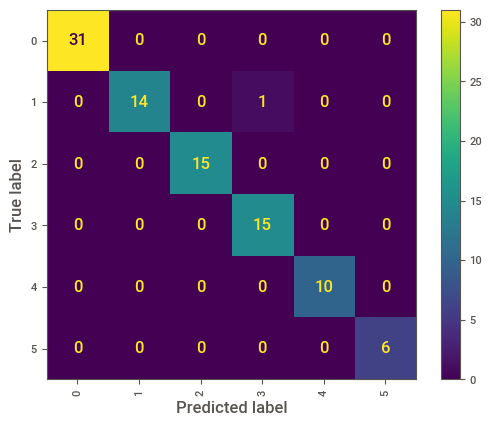

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, xticks_rotation='vertical')

### 8.2. KNN:

#### Model Building:

In [60]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [61]:
y_pred_knn = KNN.predict(x_test)
y_train_pred_knn = KNN.predict(x_train)

####  Evaluate the Module:

In [62]:
from sklearn.metrics import accuracy_score,classification_report

In [63]:
knn_acc = accuracy_score(y_test,y_pred_knn)
knn_acc

0.7608695652173914

In [64]:
# Evaluate KNN model:
print("KNN training set score:",  accuracy_score(y_train, y_train_pred_knn))
print("KNN test set score:", accuracy_score(y_test, y_pred_knn))

KNN training set score: 0.9306569343065694
KNN test set score: 0.7608695652173914


In [65]:
# Classification Report of KNN Classifier Model
print(classification_report(y_test, y_pred_knn, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       0.97      0.94      0.95        31
     seboreic_dermatitis       0.47      0.60      0.53        15
           lichen_planus       0.92      0.80      0.86        15
        pityriasis_rosea       0.62      0.53      0.57        15
       cronic_dermatitis       0.78      0.70      0.74        10
pityriasis_rubra_pilaris       0.62      0.83      0.71         6

                accuracy                           0.76        92
               macro avg       0.73      0.73      0.73        92
            weighted avg       0.78      0.76      0.77        92



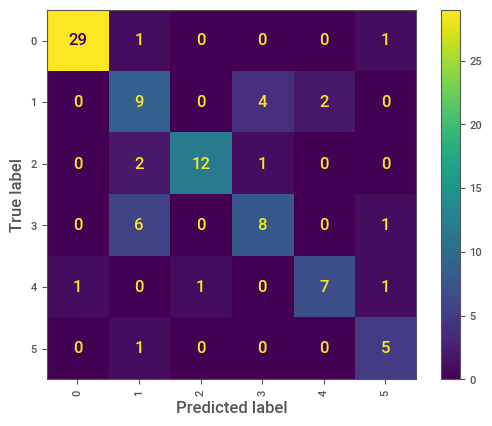

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, xticks_rotation='vertical')

In [67]:
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [68]:
# Define Parameters ranges for Tuning
params_knn_clf= {'n_neighbors':[2,3,4,5,6,7,8,9,10],
         'weights':["uniform", "distance"],
         'metric':['minkowski', 'chebyshev','euclidean','manhattan'],
         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
         'leaf_size': [20,30,40,50,60,70,80,90,100],
         'p': [1,2,3,4]}

In [70]:

from sklearn.model_selection import GridSearchCV
knn_clf = KNeighborsClassifier()
grid_search_knn_clf = GridSearchCV(knn_clf, params_knn_clf, cv=5, scoring="accuracy", n_jobs=-1)

grid_result_knn_clf = grid_search_knn_clf.fit(x_train,y_train)
print("Best Params :", grid_result_knn_clf.best_params_)

Best Params : {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}


In [71]:
knn_clf_tuned = KNeighborsClassifier(algorithm = 'auto', leaf_size = 20, metric = 'minkowski', n_neighbors = 8, p = 1, weights ='distance')
knn_clf_tuned.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=8, p=1, weights='distance')

In [72]:
y_train_pred_knn_clf_tuned = knn_clf_tuned.predict(x_train)
y_test_pred_knn_clf_tuned = knn_clf_tuned.predict(x_test)

In [73]:
Knn_clf_acc = accuracy_score(y_test,y_test_pred_knn_clf_tuned)
Knn_clf_acc

0.8913043478260869

In [74]:
# Evaluating the Tuned KNN Classifier model:
print("KNN Tuned training set score:", accuracy_score(y_train, y_train_pred_knn_clf_tuned))
print("KNN Tuned test set score:", accuracy_score(y_test, y_test_pred_knn_clf_tuned))

KNN Tuned training set score: 1.0
KNN Tuned test set score: 0.8913043478260869


In [75]:
# Classification Report of Tuned KNN Classifier Model
print(classification_report(y_test, y_test_pred_knn_clf_tuned, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      0.97      0.98        31
     seboreic_dermatitis       0.83      0.67      0.74        15
           lichen_planus       0.88      1.00      0.94        15
        pityriasis_rosea       0.76      0.87      0.81        15
       cronic_dermatitis       0.89      0.80      0.84        10
pityriasis_rubra_pilaris       0.86      1.00      0.92         6

                accuracy                           0.89        92
               macro avg       0.87      0.88      0.87        92
            weighted avg       0.89      0.89      0.89        92



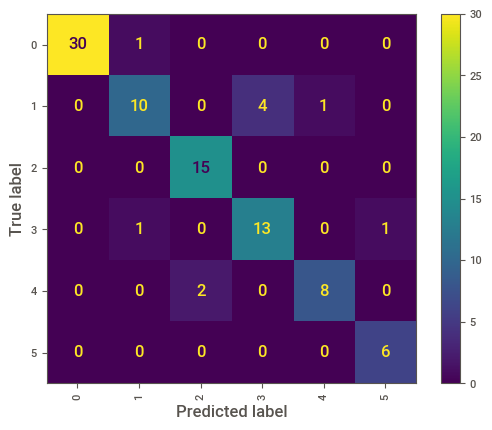

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_knn_clf_tuned, xticks_rotation='vertical')

### 8.3 Random Forest:

#### Model Building:

In [77]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train )
y_pred_rf=model.predict(x_test)

####  Evaluate the Module:

In [78]:
from sklearn.metrics import accuracy_score,classification_report

In [79]:
# Testing data accuracy
accuracy_score(y_test,y_pred_rf)

0.9239130434782609

In [80]:
# Training data accuracy
y_train_pred_rf = model.predict(x_train)

In [81]:
# Evaluate Random Forest Classifier model:

print("RFC Classifier training set score:", accuracy_score(y_train,y_train_pred_rf))
print("RFC Classifier test set score:", accuracy_score(y_test, y_pred_rf))

RFC Classifier training set score: 1.0
RFC Classifier test set score: 0.9239130434782609


In [82]:
# Classification Report of Random Forest Classifier Model
print(classification_report(y_test, y_pred_rf, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       0.97      1.00      0.98        31
     seboreic_dermatitis       1.00      0.73      0.85        15
           lichen_planus       1.00      0.87      0.93        15
        pityriasis_rosea       0.71      1.00      0.83        15
       cronic_dermatitis       1.00      1.00      1.00        10
pityriasis_rubra_pilaris       1.00      0.83      0.91         6

                accuracy                           0.92        92
               macro avg       0.95      0.91      0.92        92
            weighted avg       0.94      0.92      0.92        92



#### Hyper Parameter Tunning:

In [83]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 4, 6, 8]
min_samples_leaf = [2, 4, 6, 8]
bootstrap = [True, False]


In [84]:
# Dictionary for hyperparameters

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=78)    #model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=78, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1577, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False})


In [85]:
rf_clf2 = RandomForestClassifier(n_estimators= 1577,
                                 min_samples_split=4, 
                                 min_samples_leaf= 2,
                                 max_features='sqrt',
                                 max_depth=None,
                                 bootstrap=False)#passing best parameter to randomforest
rf_clf2.fit(x_train,y_train)
y_predict_rf_clf=rf_clf2.predict(x_test)

In [86]:
# Training data accuracy
y_train_pred_rf_clf=rf_clf2.predict(x_train)

In [87]:
# Testing data accuracy
rf_acc = accuracy_score(y_test,y_predict_rf_clf)
rf_acc

0.9347826086956522

In [88]:
# Evaluate Random Forest Classifier model:

print("RFC Classifier training set score:", accuracy_score(y_train,y_train_pred_rf_clf))
print("RFC Classifier test set score:", accuracy_score(y_test, y_predict_rf_clf))

RFC Classifier training set score: 1.0
RFC Classifier test set score: 0.9347826086956522


In [89]:
# Classification Report of Random Forest Classifier Model
print(classification_report(y_test, y_predict_rf_clf, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       0.97      1.00      0.98        31
     seboreic_dermatitis       1.00      0.80      0.89        15
           lichen_planus       1.00      0.87      0.93        15
        pityriasis_rosea       0.75      1.00      0.86        15
       cronic_dermatitis       1.00      1.00      1.00        10
pityriasis_rubra_pilaris       1.00      0.83      0.91         6

                accuracy                           0.93        92
               macro avg       0.95      0.92      0.93        92
            weighted avg       0.95      0.93      0.94        92



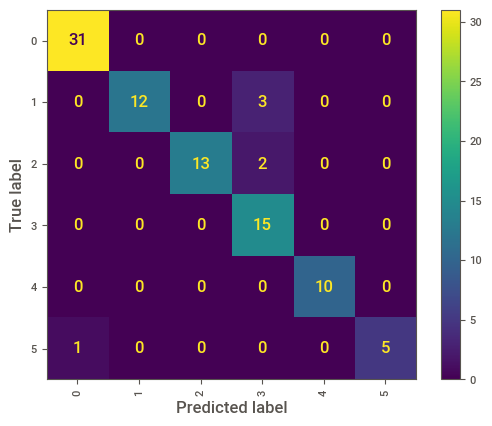

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_rf_clf, xticks_rotation='vertical')

### 8.4 Decision Tree:

#### Model Building:

In [91]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()

model.fit(x_train,y_train)

DecisionTreeClassifier()

In [92]:
y_pred_dtc=model.predict(x_test)

In [93]:
y_train_predict_dtc=model.predict(x_train)   #predicting training data to check training performance

In [94]:
from sklearn.metrics import accuracy_score,classification_report

In [95]:
# Training data accuracy
accuracy_score(y_train,y_train_predict_dtc)

1.0

In [96]:
# Testing data accuracy
accuracy_score(y_test,y_pred_dtc)

0.9239130434782609

In [97]:
# Evaluate Decision Tree Classifier model:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
print("DTC training set score:", accuracy_score(y_train, y_train_predict_dtc))
print("DTC test set score:",  accuracy_score(y_test, y_pred_dtc))

DTC training set score: 1.0
DTC test set score: 0.9239130434782609


In [98]:
# Classification Report of Decision Tree Classfier Model

print(classification_report(y_test, y_pred_dtc, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       0.97      1.00      0.98        31
     seboreic_dermatitis       0.93      0.93      0.93        15
           lichen_planus       0.87      0.87      0.87        15
        pityriasis_rosea       0.80      0.80      0.80        15
       cronic_dermatitis       1.00      1.00      1.00        10
pityriasis_rubra_pilaris       1.00      0.83      0.91         6

                accuracy                           0.92        92
               macro avg       0.93      0.91      0.92        92
            weighted avg       0.92      0.92      0.92        92



#### Hyper Parameter Tunning:

In [100]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num=12)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 5, 10, 15]
bootstrap = [True, False]

In [101]:
# dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=56)    #model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=68, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1136, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False})


In [102]:
rf_clf2 = RandomForestClassifier(n_estimators= 1136,
                                 min_samples_split=5, 
                                 min_samples_leaf= 5,
                                 max_features='sqrt',
                                 max_depth=50,
                                 bootstrap=False)   #passing best parameter to randomforest
rf_clf2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=1136)

In [103]:
y_train_pred_rf_clf_dtc=rf_clf2.predict(x_train)
y_predict_rf_clf_dtc= rf_clf2.predict(x_test)

In [104]:
# Testing data accuracy
dt_acc = accuracy_score(y_test,y_predict_rf_clf_dtc)
dt_acc

0.9239130434782609

In [105]:
# Evaluate Decision Tree Classifier model:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
print("DTC training set score:", accuracy_score(y_train, y_train_pred_rf_clf_dtc))
print("DTC test set score:",  accuracy_score(y_test, y_predict_rf_clf_dtc))

DTC training set score: 0.9781021897810219
DTC test set score: 0.9239130434782609


In [106]:
# Classification Report of Decision Tree Classfier Model
print(classification_report(y_test, y_predict_rf_clf_dtc, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       0.97      1.00      0.98        31
     seboreic_dermatitis       1.00      0.73      0.85        15
           lichen_planus       1.00      0.87      0.93        15
        pityriasis_rosea       0.71      1.00      0.83        15
       cronic_dermatitis       1.00      1.00      1.00        10
pityriasis_rubra_pilaris       1.00      0.83      0.91         6

                accuracy                           0.92        92
               macro avg       0.95      0.91      0.92        92
            weighted avg       0.94      0.92      0.92        92



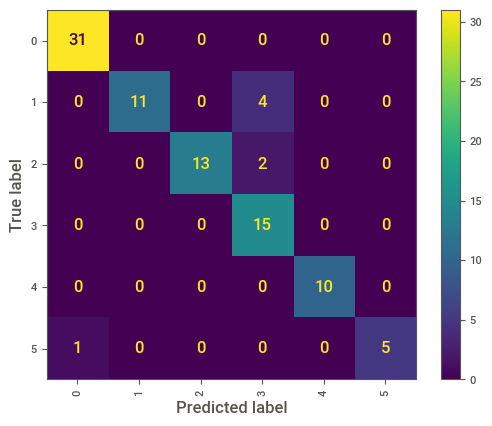

In [107]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_rf_clf_dtc, xticks_rotation='vertical')

### 8.5 Gradiant Boosting:

#### Model Building:

In [108]:
# Import the model library

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [109]:
y_pred_gbc = gbc.predict(x_test)
y_train_pred_gbc = gbc.predict(x_train)

####  Evaluate the Module:

In [110]:
from sklearn.metrics import accuracy_score,classification_report

In [111]:
# Testing data accuracy
gbc_acc = accuracy_score(y_test,y_pred_gbc)
gbc_acc

0.9456521739130435

In [112]:
# Evaluate Gradient Boosting Classifier model:
print("GBC training set score:", accuracy_score(y_train,y_train_pred_gbc))
print("GBC test set score:", accuracy_score(y_test, y_pred_gbc))

GBC training set score: 1.0
GBC test set score: 0.9456521739130435


In [113]:
# Classification Report of Gradient Boosting Classifier Model

print(classification_report(y_test, y_pred_gbc, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        31
     seboreic_dermatitis       1.00      0.80      0.89        15
           lichen_planus       1.00      0.87      0.93        15
        pityriasis_rosea       0.75      1.00      0.86        15
       cronic_dermatitis       1.00      1.00      1.00        10
pityriasis_rubra_pilaris       1.00      1.00      1.00         6

                accuracy                           0.95        92
               macro avg       0.96      0.94      0.95        92
            weighted avg       0.96      0.95      0.95        92



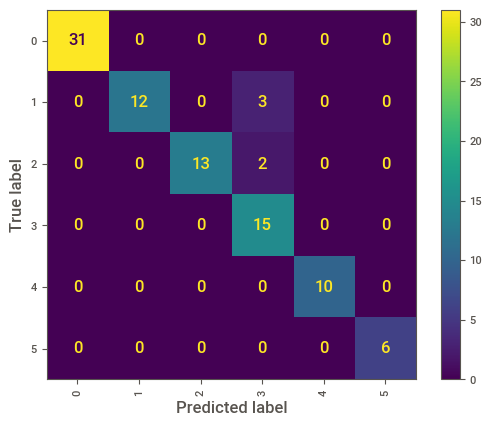

In [114]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gbc, xticks_rotation='vertical')

### 8.6 XG Boost Classifier:
#### Model Building:

In [115]:
## Installing XG Boost library
! pip install xgboost

In [116]:
import xgboost as xgb

In [117]:
# Create training and testing data:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45)

In [118]:
dtrain = xgb.DMatrix(x_train,label = y_train)
dtest = xgb.DMatrix(x_test,label = y_test)

In [119]:
# Model Building

from xgboost import XGBClassifier
xgb = XGBClassifier() 
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [120]:
y_pred_xgb= xgb.predict(x_test)
y_train_pred_xgb = xgb.predict(x_train)

####  Evaluate the Module:

In [121]:
from sklearn.metrics import accuracy_score,classification_report

In [122]:
xgb_acc = accuracy_score(y_test,y_pred_xgb)
xgb_acc

0.9456521739130435

In [123]:
# Evaluate XG Boosting model:

print("XBG training set score:", accuracy_score(y_train,y_train_pred_xgb))
print("XGB test set score:", accuracy_score(y_test, y_pred_xgb))

XBG training set score: 1.0
XGB test set score: 0.9456521739130435


In [124]:
# Classification Report of XG Boosting Model :

print(classification_report(y_test, y_pred_xgb, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       0.97      1.00      0.98        31
     seboreic_dermatitis       1.00      0.80      0.89        15
           lichen_planus       1.00      0.93      0.97        15
        pityriasis_rosea       0.79      1.00      0.88        15
       cronic_dermatitis       1.00      1.00      1.00        10
pityriasis_rubra_pilaris       1.00      0.83      0.91         6

                accuracy                           0.95        92
               macro avg       0.96      0.93      0.94        92
            weighted avg       0.96      0.95      0.95        92



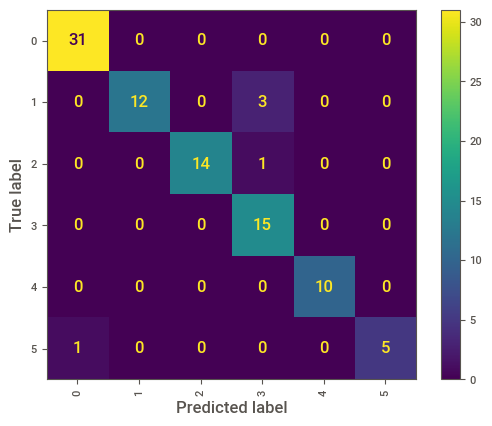

In [125]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, xticks_rotation='vertical')

### 8.7 Naive Bayes:
#### Model Building:

In [126]:
from sklearn.naive_bayes import MultinomialNB
Naive_bayes = MultinomialNB()
Naive_bayes.fit(x_train,y_train)

MultinomialNB()

In [127]:
y_pred_nb = Naive_bayes.predict(x_test)
y_train_pred_nb = Naive_bayes.predict(x_train)

#### Evaluate the Module:

In [128]:
from sklearn.metrics import accuracy_score,classification_report

In [129]:
nb_acc = accuracy_score(y_test,y_pred_nb)
nb_acc

0.9239130434782609

In [130]:
# Evaluate Naive Bayes model:
print("naive_Bayes training set score:", accuracy_score(y_train,y_train_pred_nb))
print("naive_Bayes test set score:", accuracy_score(y_test, y_pred_nb))

naive_Bayes training set score: 0.9598540145985401
naive_Bayes test set score: 0.9239130434782609


In [131]:
# Classification Report of Naive Bayes Model:
print(classification_report(y_test, y_pred_nb, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        31
     seboreic_dermatitis       1.00      0.67      0.80        15
           lichen_planus       0.93      0.93      0.93        15
        pityriasis_rosea       0.70      0.93      0.80        15
       cronic_dermatitis       1.00      1.00      1.00        10
pityriasis_rubra_pilaris       1.00      1.00      1.00         6

                accuracy                           0.92        92
               macro avg       0.94      0.92      0.92        92
            weighted avg       0.94      0.92      0.92        92



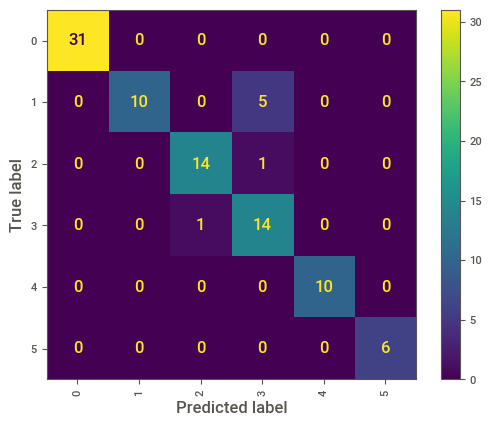

In [132]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, xticks_rotation='vertical')

### 8.8 SVC:
#### Model Building:

In [133]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [134]:
y_pred_svc = svc.predict(x_test)
y_train_pred_svc =svc.predict(x_train)

####  Evaluate the Module:

In [135]:
from sklearn.metrics import accuracy_score,classification_report

In [136]:
svc_acc = accuracy_score(y_test,y_pred_svc)
svc_acc

0.5978260869565217

In [137]:
# Evaluate SVC model:
print("SVC training set score:", accuracy_score(y_train,y_train_pred_svc))
print("SVC test set score:", accuracy_score(y_test, y_pred_svc))

SVC training set score: 0.6277372262773723
SVC test set score: 0.5978260869565217


In [138]:
# Classification Report of SVC Model:
print(classification_report(y_test, y_pred_svc, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       0.88      0.97      0.92        31
     seboreic_dermatitis       0.30      0.40      0.34        15
           lichen_planus       0.43      0.80      0.56        15
        pityriasis_rosea       0.00      0.00      0.00        15
       cronic_dermatitis       1.00      0.20      0.33        10
pityriasis_rubra_pilaris       0.62      0.83      0.71         6

                accuracy                           0.60        92
               macro avg       0.54      0.53      0.48        92
            weighted avg       0.57      0.60      0.54        92



#### Hyper Parameter Tunning:

In [139]:
# Grid Search CV
:
from sklearn.model_selection import GridSearchCV


# defining the hyperparameter range:
param_grid = {'C':[0.1,1,5,10,50,60,70],'gamma':[1,0.1,0.01,0.001,0.0001],'random_state':list(range(1,20)),'kernel':['rbf','poly','sigmoid','linear']}
model = SVC()
grid= GridSearchCV(model,param_grid,verbose=2,scoring="accuracy",cv=5)
grid.fit(x,y)

Fitting 5 folds for each of 2660 candidates, totalling 13300 fits
[CV] END .........C=0.1, gamma=1, kernel=rbf, random_state=1; total time=   0.0s
[CV] END .........C=0.1, gamma=1, kernel=rbf, random_state=1; total time=   0.0s
[CV] END .........C=0.1, gamma=1, kernel=rbf, random_state=1; total time=   0.0s
[CV] END .........C=0.1, gamma=1, kernel=rbf, random_state=1; total time=   0.0s
[CV] END .........C=0.1, gamma=1, kernel=rbf, random_state=1; total time=   0.0s
[CV] END .........C=0.1, gamma=1, kernel=rbf, random_state=2; total time=   0.0s
[CV] END .........C=0.1, gamma=1, kernel=rbf, random_state=2; total time=   0.0s
[CV] END .........C=0.1, gamma=1, kernel=rbf, random_state=2; total time=   0.0s
[CV] END .........C=0.1, gamma=1, kernel=rbf, random_state=2; total time=   0.0s
[CV] END .........C=0.1, gamma=1, kernel=rbf, random_state=2; total time=   0.0s
[CV] END .........C=0.1, gamma=1, kernel=rbf, random_state=3; total time=   0.0s
[CV] END .........C=0.1, gamma=1, kernel=rb

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy', verbose=2)

In [140]:
print(grid.best_params_)

{'C': 50, 'gamma': 0.001, 'kernel': 'rbf', 'random_state': 1}


In [141]:
model =SVC(C=50, gamma=0.001, random_state=1, kernel= 'rbf')
model.fit(x_train,y_train)

SVC(C=50, gamma=0.001, random_state=1)

In [142]:
y_pred_hp_svc=model.predict(x_test)
y_train_pred_hp_svc = model.predict(x_train)

In [143]:
svc_hp_acc = accuracy_score(y_test,y_pred_hp_svc)
svc_hp_acc

0.967391304347826

In [144]:
# Evaluating SVC model:
print("GBC training set score:", accuracy_score(y_train,y_train_pred_hp_svc))
print("GBC test set score:", accuracy_score(y_test, y_pred_hp_svc))

GBC training set score: 0.9781021897810219
GBC test set score: 0.967391304347826


In [145]:
# Classification Report of SVC Model:

print(classification_report(y_test, y_pred_hp_svc, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        31
     seboreic_dermatitis       0.93      0.93      0.93        15
           lichen_planus       1.00      0.93      0.97        15
        pityriasis_rosea       0.88      0.93      0.90        15
       cronic_dermatitis       1.00      1.00      1.00        10
pityriasis_rubra_pilaris       1.00      1.00      1.00         6

                accuracy                           0.97        92
               macro avg       0.97      0.97      0.97        92
            weighted avg       0.97      0.97      0.97        92



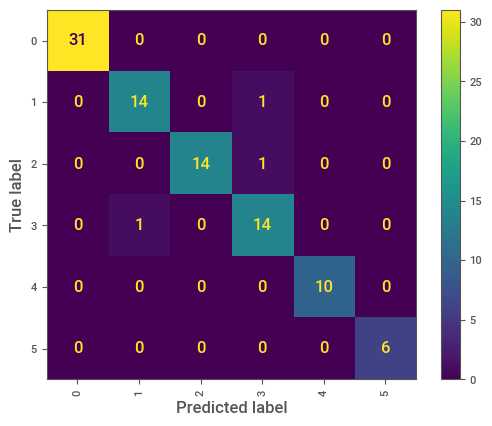

In [146]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_hp_svc, xticks_rotation='vertical')

In [147]:
Model_Comparison= pd.DataFrame({'Model':['Logistic Regressor ()',
                                         'KNN Classifier (Tuned)',
                                         'Random Forest Classifier',
                                         'Decision Tree Classifier()',
                                         'Gradient Boosting Classifier()',
                                         'XG Boosting Classifier()',
                                         'Multinomial Naive Bayes Classifier()',
                                         'Support Vector Classifier(Tuned) '],

                                'Train Score':[accuracy_score(y_train, y_train_pred_lr),
                                               accuracy_score(y_train, y_train_pred_knn_clf_tuned),
                                               accuracy_score(y_train, y_train_pred_rf_clf),
                                               accuracy_score(y_train, y_train_pred_rf_clf_dtc),
                                               accuracy_score(y_train, y_train_pred_gbc),
                                               accuracy_score(y_train, y_train_pred_xgb),
                                               accuracy_score(y_train, y_train_pred_nb),
                                               accuracy_score(y_train, y_train_pred_hp_svc)],
                                'Test Score':[accuracy_score(y_test, y_pred_lr),
                                              accuracy_score(y_test, y_test_pred_knn_clf_tuned),
                                              accuracy_score(y_test, y_predict_rf_clf),
                                              accuracy_score(y_test, y_predict_rf_clf_dtc),
                                              accuracy_score(y_test, y_pred_gbc),
                                              accuracy_score(y_test, y_pred_xgb),
                                              accuracy_score(y_test, y_pred_nb),
                                              accuracy_score(y_test, y_pred_hp_svc)]})
Model_Comparison.index+=1
Model_Comparison

,Model,Train Score,Test Score
1,Logistic Regressor (),0.989051,0.989130
2,KNN Classifier (Tuned),1.000000,0.891304
3,Random Forest Classifier,1.000000,0.934783
4,Decision Tree Classifier(),0.978102,0.923913
5,Gradient Boosting Classifier(),1.000000,0.945652
6,XG Boosting Classifier(),1.000000,0.945652
7,Multinomial Naive Bayes Classifier(),0.959854,0.923913
8,Support Vector Classifier(Tuned),0.978102,0.967391


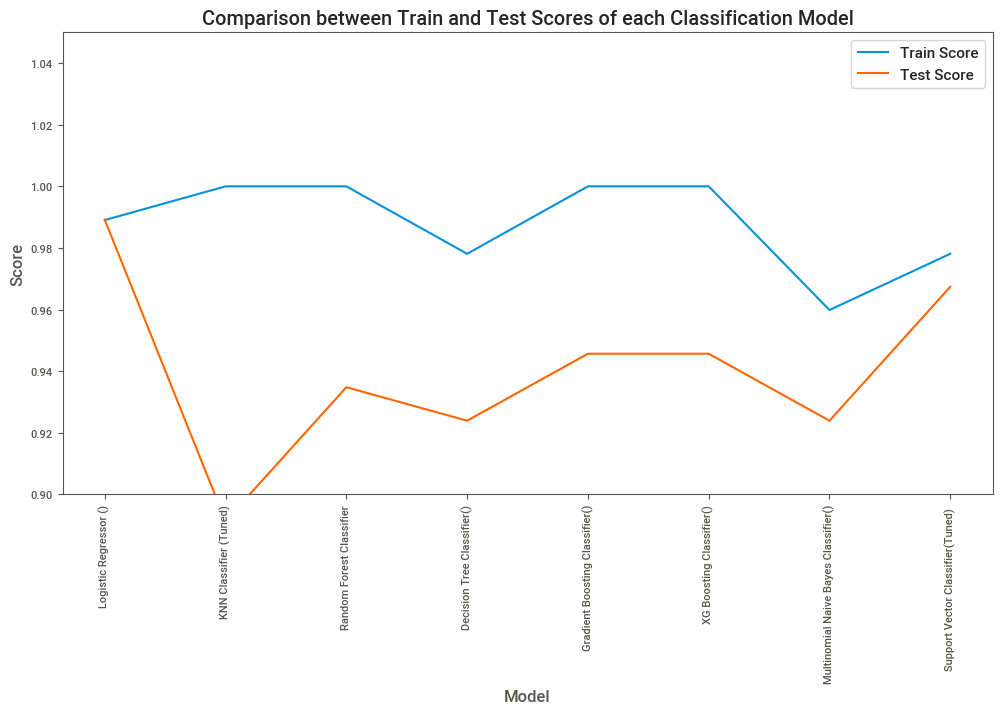

In [148]:
import matplotlib.pyplot as plt

# Get the data from the dataframe
model_names = Model_Comparison['Model'].tolist()
train_scores = Model_Comparison['Train Score'].tolist()
test_scores = Model_Comparison['Test Score'].tolist()
plt.figure(figsize=(12,6))
# Plot the data
plt.plot(model_names, train_scores, label='Train Score', color='#0590DA')
plt.plot(model_names, test_scores, label='Test Score', color='#FF6600')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0.900, 1.05)
plt.title('Comparison between Train and Test Scores of each Classification Model')
plt.show()

In [149]:
scores = [lr_acc,Knn_clf_acc,rf_acc,dt_acc,gbc_acc,xgb_acc,nb_acc,svc_hp_acc]
algorithms = ["Logistic Regressor","KNN Classifier","Random Forest Classifier","Decision Tree Classifier",
              "Gradient Boosting Classifier","XG Boosting Classifier","Multinomial Naive Bayes Classifier","Support Vector Classifier"]    

for i in range(len(algorithms)):
    print("The R2 score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The R2 score achieved using Logistic Regressor is: 0.9891304347826086 %
The R2 score achieved using KNN Classifier is: 0.8913043478260869 %
The R2 score achieved using Random Forest Classifier is: 0.9347826086956522 %
The R2 score achieved using Decision Tree Classifier is: 0.9239130434782609 %
The R2 score achieved using Gradient Boosting Classifier is: 0.9456521739130435 %
The R2 score achieved using XG Boosting Classifier is: 0.9456521739130435 %
The R2 score achieved using Multinomial Naive Bayes Classifier is: 0.9239130434782609 %
The R2 score achieved using Support Vector Classifier is: 0.967391304347826 %


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Logistic Regressor'),
  Text(1, 0, 'KNN Classifier'),
  Text(2, 0, 'Random Forest Classifier'),
  Text(3, 0, 'Decision Tree Classifier'),
  Text(4, 0, 'Gradient Boosting Classifier'),
  Text(5, 0, 'XG Boosting Classifier'),
  Text(6, 0, 'Multinomial Naive Bayes Classifier'),
  Text(7, 0, 'Support Vector Classifier')])

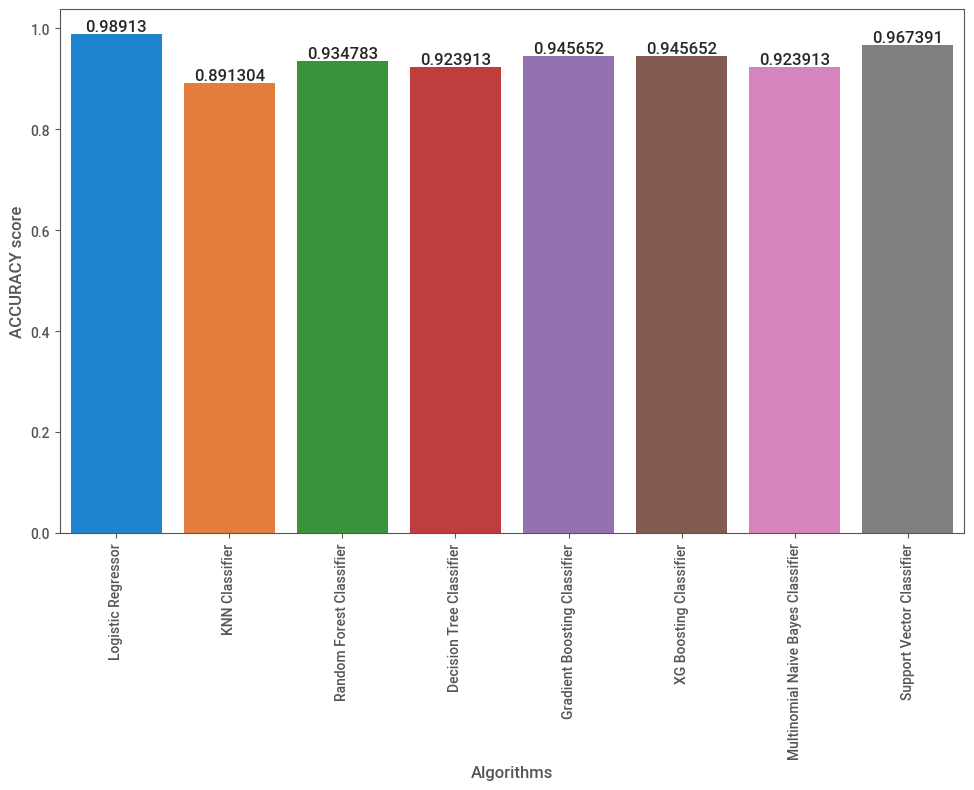

In [150]:
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel("ACCURACY score")
ax=sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()
plt.tick_params(labelsize=10)
plt.xticks(rotation=90)

## Summary:

* Diagnosing erythemato-squamous diseases in dermatology is challenging because these conditions share common clinical characteristics, such as erythema and scaling, making them difficult to distinguish. This category includes psoriasis, seborrheic dermatitis, lichen planus, pityriasis rosea, chronic dermatitis, and pityriasis rubra pilaris. While biopsies are typically used for diagnosis, the diseases often have overlapping histopathological features, complicating accurate identification. Moreover, in early stages, one disease may exhibit features typical of another, adding to the diagnostic complexity. The initial clinical evaluation includes 12 features, with additional analysis of skin samples to identify 22 histopathological features through microscopic examination.

* **Primary Objective:** The main aim is to create robust machine learning models that can reliably classify these skin diseases, addressing the challenges posed by their clinical and histopathological overlaps.

#### METHODOLOGY

* The dataset consists of 12 clinical features and 22 histopathological features. The "family history" feature is set to 1 if there's a known history of any of these diseases in the family, and 0 otherwise. The "age" feature indicates the patient's age. All other features, both clinical and histopathological, are scored on a scale of 0 to 3. Here, 0 means the feature is absent, 3 indicates the maximum presence, and 1 or 2 represent intermediate values.

* Exploratory data analysis (EDA) was performed to understand each feature individually and in relation to others. This included examining distributions, patterns, and potential correlations.

* The "age" feature contained some missing and zero values. These were handled by replacing them with the median of the "age" values in the dataset.

* Feature correlations were visualized using a heatmap, which helped identify relationships and potential redundancies among the features.tures.**

### INSIGHTS FROM EDA:

* The distribution of the 12 clinical features and 22 histopathological features for a dataset of 366 instances was visualized using histograms and Kernel Density Estimation (KDE) plots.

* Diseases like Lichen Planus, Chronic Dermatitis, and Pityriasis Rosea do not show any significant pattern of familial transmission. Additionally, these diseases can occur at any age, from early childhood to around 70 years, as indicated by the distribution data.

* In contrast, diseases like Psoriasis and Pityriasis Rubra Pilaris exhibit strong familial ties, suggesting a possible hereditary component. Seborrheic Dermatitis also shows some level of familial association, though it's not as strong as the other two.

* Pityriasis Rubra Pilaris tends to manifest in early ages, typically between 15 and 20 years, with no cases reported beyond this range.

* Diseases like Psoriasis and Seborrheic Dermatitis occur across a wider age range, from early childhood through to about 70 years.

* The target class count plot revealed an imbalance among different classes, which was addressed using a combination of Synthetic Minority Over-sampling Technique (SMOTE) and the edited nearest neighbor approach.

* A heatmap was used to assess the correlation among various features, helping to identify any strong relationships or redundancies within the dataset.

### INSIGHTS FROM CLASSIFICATION MODELS:

#### Model-1: Logistic Regression Classifier
* The Logistic Regression model, after tuning, achieved accuracy scores of 0.9890 for the training data and 0.9891 for the test data.

#### Model-2: K-Nearest Neighbors (KNN) Classifier
* The tuned KNN classifier showed perfect accuracy (1.0) on the training set, but the accuracy on the test data was lower at 0.8913, suggesting possible overfitting.

#### Model-3: Random Forest Classifier
* With the Random Forest classifier, the accuracy scores were 1.0 for the training set and 0.9347 for the test set, indicating high performance with some risk of overfitting.

#### Model-4: Decision Tree Classifier
* The Decision Tree classifier achieved accuracy scores of 0.9781 for the training data and 0.9239 for the test data, indicating a solid performance.

#### Model-5: Gradient Boosting Classifier
* The Gradient Boosting classifier demonstrated perfect accuracy on the training data (1.0) and a robust 0.9456 on the test data, suggesting it is an effective model with reduced risk of overfitting.

#### Model-6: XGBoost Classifier
* The XGBoost classifier achieved accuracy scores of 1.0 on the training set and 0.9456 on the test set, indicating a high performance with potential overfitting.

#### Model-7: Multinomial Naive Bayes Classifier
* The Multinomial Naive Bayes classifier obtained accuracy scores of 0.9598 for the training set and 0.9239 for the test set, indicating good generalization.

#### Model-8: Support Vector Classifier
* The Support Vector Classifier (SVC) achieved accuracy scores of 0.9781 for the training data and 0.9673 for the test data, demonstrating strong performance with lower overfitting risk.

Based on these results, models such as the Support Vector Classifier and Gradient Boosting Classifier show a good balance of accuracy and generalization, whereas models with perfect accuracy on the training set like KNN and Random Forest might require further tuning to reduce overfitting.


#### CHALLENGES FACED:

* The 'age' feature contained missing (NaN) and zero values. To address this, we replaced these with the median value of the 'age' feature.

* Several classification models were analyzed and evaluated using different metrics like accuracy score, classification report, and confusion matrix to determine their performance and generalization.

* The model with the highest accuracy score was the Logistic Classifier, suggesting it as a potential choice for the final model, but other factors, like overfitting and precision, also need to be considered.